In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import asapy
import numpy as np
from time import time

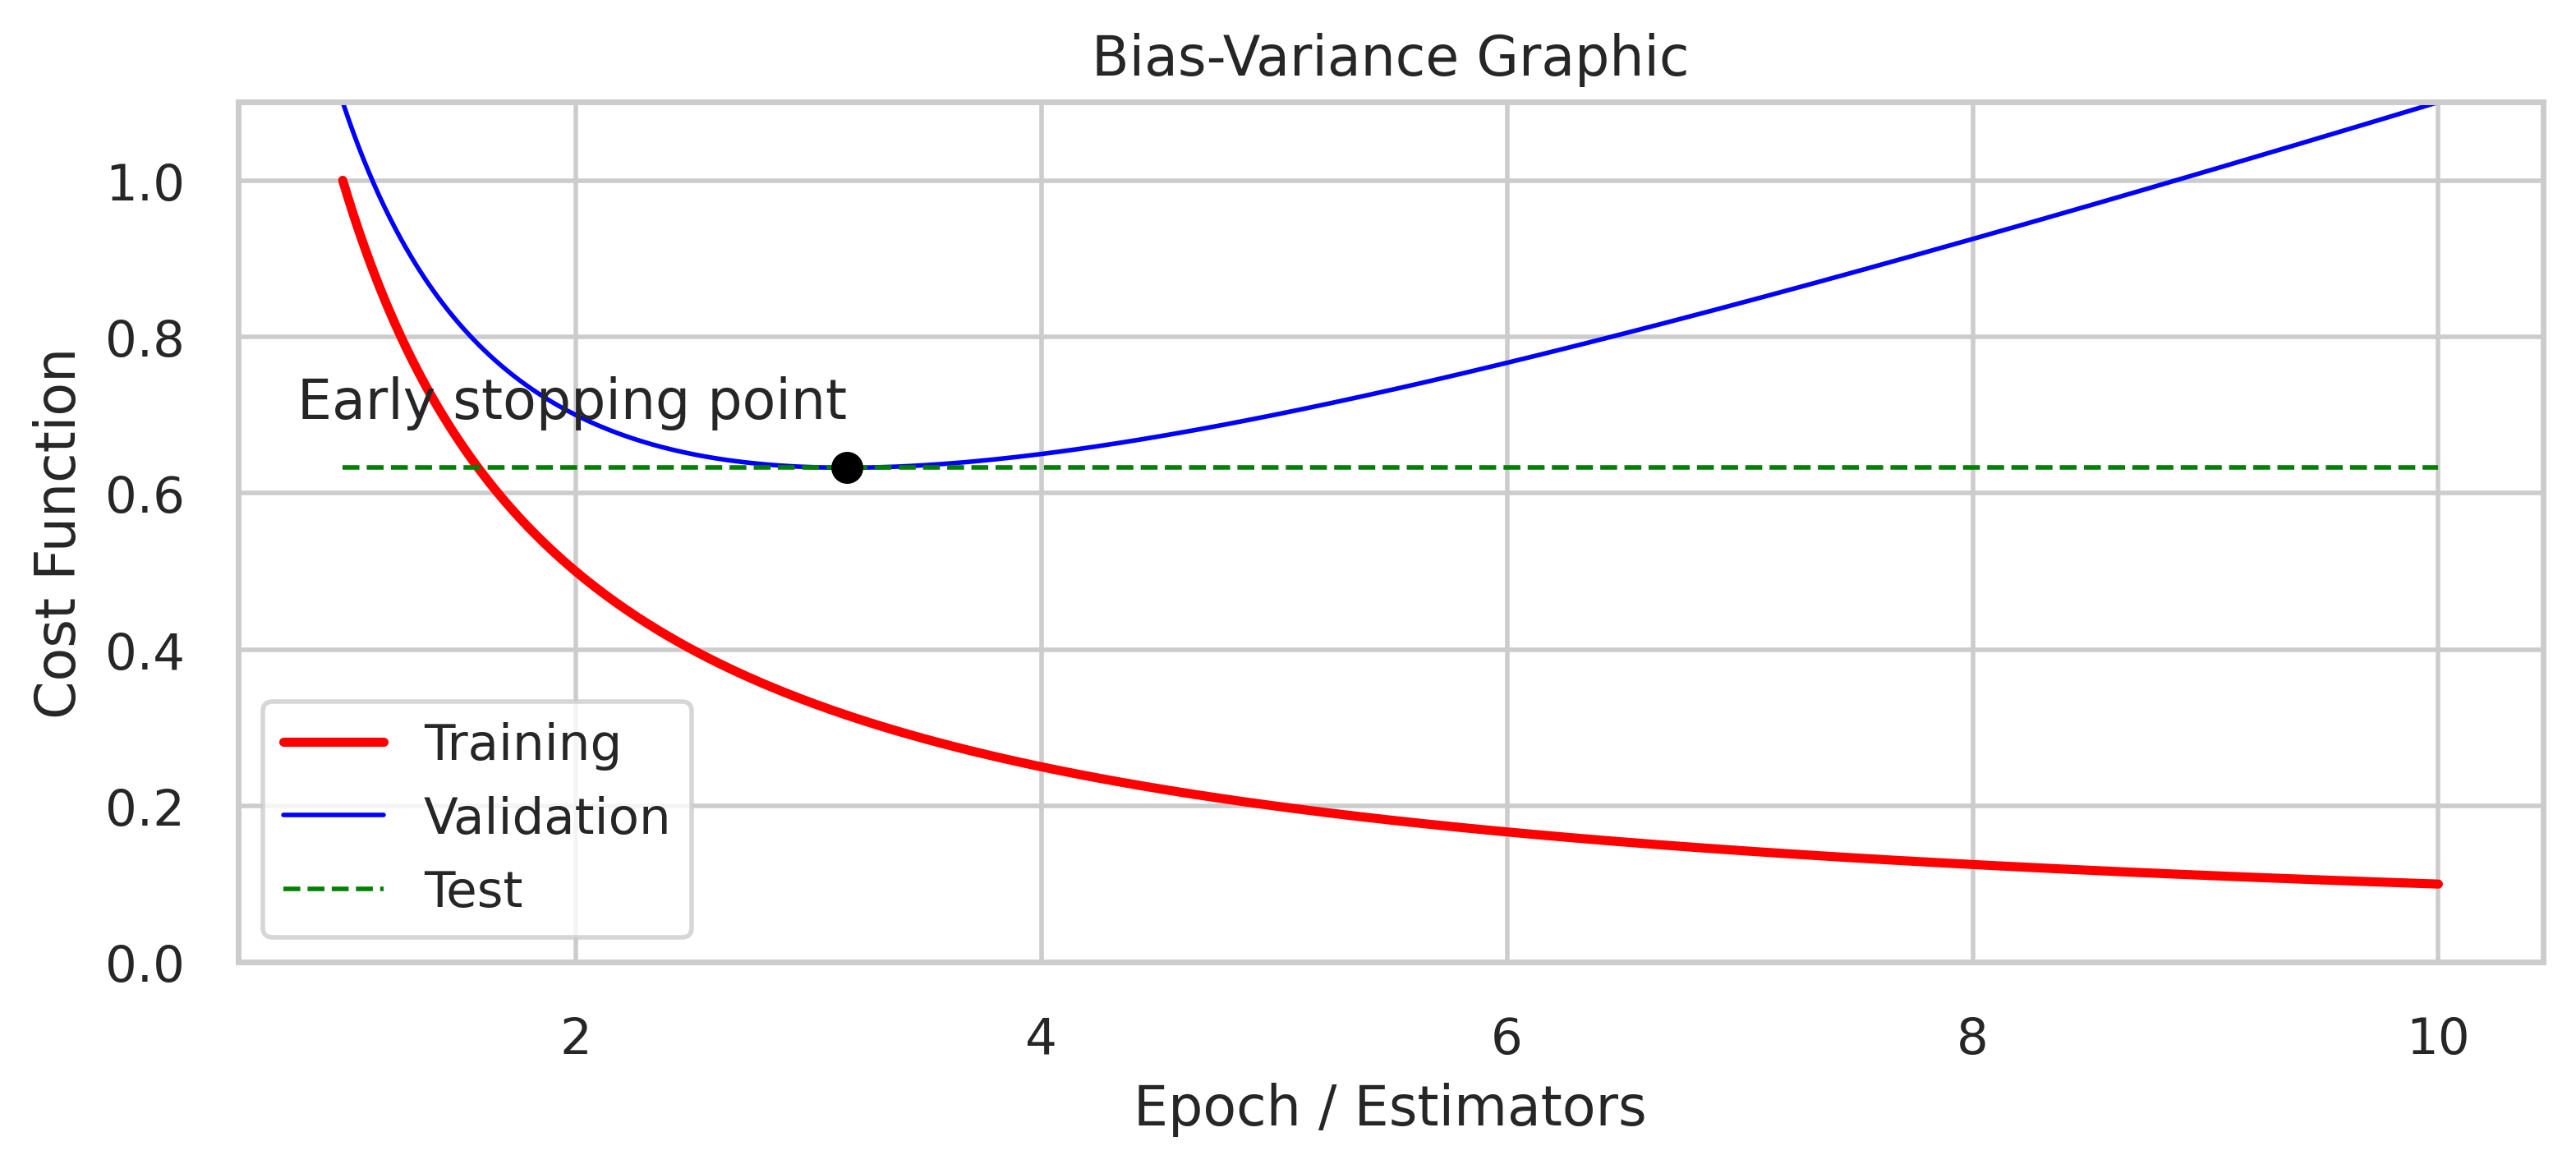

In [32]:
import matplotlib.pyplot as plt
import numpy as np

# Define model complexity range
model_complexity = np.linspace(1, 10, 400)
# Bias curve (decreases as model complexity increases)
bias = 1 / (model_complexity)
# Variance curve (increases as model complexity increases)
variance = model_complexity / 10
# Total error = bias + variance (simplified for illustration)
total_error = bias + variance

# Optimal point calculation (for illustration purposes)
optimal_idx = np.argmin(total_error)
optimal_complexity = model_complexity[optimal_idx]
optimal_error = total_error[optimal_idx]

# Performance metric on test data (for illustration, set as near the minimum total error but slightly higher)
performance_metric_test_data = np.min(total_error)


# Removing the variance curve and adjusting labels for training (bias), validation (total error), and test data
plt.figure(figsize=(8, 4))
plt.plot(model_complexity, bias, label='Training', color='red', linewidth=2)
plt.plot(model_complexity, total_error, label='Validation', color='blue', linewidth=1)
plt.hlines(performance_metric_test_data, xmin=1, xmax=10, colors='green', label='Test', linestyles='--', linewidth=1)

# Highlighting the optimal point without referring to it as variance
plt.scatter(optimal_complexity, optimal_error, color='black', zorder=5)
plt.text(optimal_complexity, optimal_error*1.1, 'Early stopping point', horizontalalignment='right')

# Annotations and styling adjustments
plt.title('Bias-Variance Graphic')
plt.xlabel('Epoch / Estimators')
plt.ylabel('Cost Function')
plt.legend()
plt.grid(True)
plt.ylim(0, 1.1)
plt.tight_layout(rect=[0, 0.05, 1, 0.98])

plt.savefig("Bias-VarianceGraphic.png")
plt.show()


# Cenário: Demonstração de Navegação com Aeronave de Caça

### Descrição Geral:
Este cenário descreve um voo de navegação realizado por uma aeronave de caça, enfocando a execução de manobras em diferentes altitudes e velocidades. A navegação abrange uma variação de altitude entre Flight Level (FL) 100 e FL 350, bem como uma variação de velocidade entre 350 knots e 550 knots. Durante este voo, no terceiro ponto da rota, a aeronave realizará uma manobra de espera em torno de um ponto específico (**Hold**) durante 10 minutos, integrando-a ao padrão de voo.

<img src='./data/nav_demo.gif' width='500' height='500'>

#### Carregando Dados das Simulações

Nesta célula, estamos carregando dados de diferentes simulações a partir de arquivos CSV. Para cada cenário, existem dois tipos de arquivos:

1. Arquivos `*_aliases.csv`: Estes contêm as entradas (ou parâmetros) para cada simulação.

2. Arquivos `*_output.csv`: Estes contêm os resultados das simulações. 

Os dados são lidos e carregados em DataFrames do pandas para análise e processamento subsequentes.


In [33]:
x = pd.read_csv('./data/nav_demo_aliases.csv')
y = pd.read_csv('./data/nav_demo_output.csv')

In [34]:
preprocessing  = asapy.Preprocessing()

x = preprocessing.aliases(x)
y = preprocessing.team_metrics(y)

In [35]:
df_nav = pd.merge(x, y[['fuel_consumed']], left_index=True, right_index=True)

In [36]:
sample_nav = df_nav.sample(10)
df_nav = df_nav.loc[~df_nav.index.isin(sample_nav.index)]

In [37]:
df_nav.head(5)

speed  altitude  fuel_consumed
experiment                                 
0           485.10  13339.30    1460.593196
1           518.46  34516.34     883.070714
2           501.61  23487.75    1063.105283
3           525.65  16748.43    1400.689116
4           438.32  21489.87    1051.047824

In [38]:
_df_nav = df_nav.copy()

In [39]:
_df_nav["speed_without_mean"] = df_nav["speed"] - df_nav["speed"].mean()

In [40]:
_df_nav["altitude_without_mean"] = df_nav["altitude"] - df_nav["altitude"].mean()

In [41]:
_df_nav["speed_without_mean_div_std"] = (df_nav["speed"] - df_nav["speed"].mean()) / df_nav["speed"].std()

In [42]:
_df_nav["altitude_without_mean_div_std"] = (df_nav["altitude"] - df_nav["altitude"].mean()) / df_nav["altitude"].std()

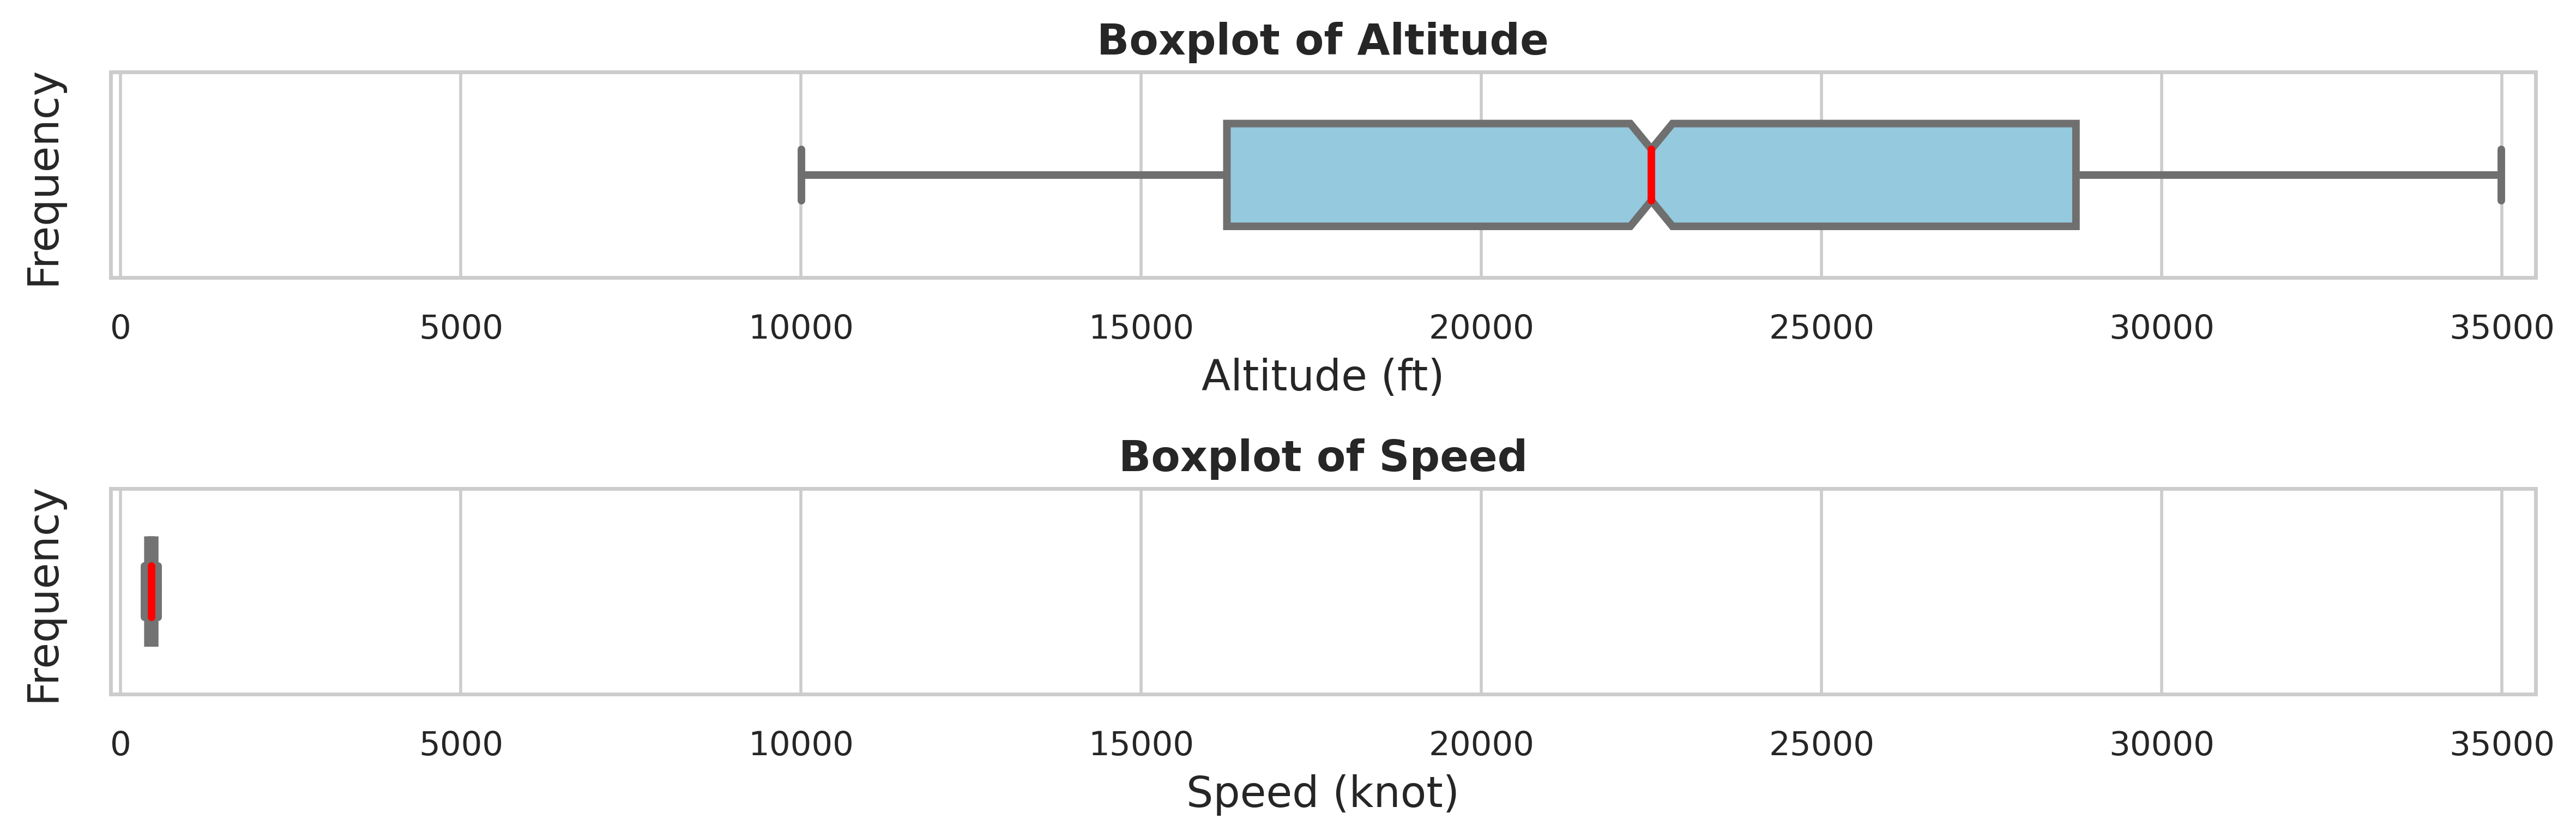

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt

# Definindo o estilo do gráfico
sns.set(style="whitegrid")

# Criando uma nova figura para os boxplots
plt.figure(figsize=(12, 4))

medianprops = dict(linestyle='-', linewidth=2.5, color='red')

min_value = min(_df_nav["speed"].min() - 500, _df_nav["altitude"].min() - 500)
max_value = max(_df_nav["speed"].max() + 500, _df_nav["altitude"].max() + 500)

# Criando o boxplot para altitude_without_mean_div_std
plt.subplot(2, 1, 1)  # 1 linha, 2 colunas, posição 2
sns.boxplot(x=_df_nav["altitude"], width=0.5, fliersize=5, linewidth=2.5, notch=True, color="skyblue", medianprops=medianprops)
plt.title('Boxplot of Altitude', fontsize=14, fontweight='bold')
plt.xlim(min_value, max_value)  # Definindo os mesmos limites para o eixo x
plt.xlabel("Altitude (ft)", fontsize=14)
plt.ylabel("Frequency", fontsize=14)

# Criando o boxplot para speed_without_mean_div_std
plt.subplot(2, 1, 2)  # 1 linha, 2 colunas, posição 1
sns.boxplot(x=_df_nav["speed"], width=0.5, fliersize=5, linewidth=2.5, notch=True, color="lightgreen", medianprops=medianprops)
plt.title('Boxplot of Speed', fontsize=14, fontweight='bold')
plt.xlim(min_value, max_value)  # Definindo os mesmos limites para o eixo x
plt.xlabel("Speed (knot)", fontsize=14)
plt.ylabel("Frequency", fontsize=14)

# Mostrando o gráfico
plt.tight_layout()

plt.savefig('boxplot1.png')
plt.show()

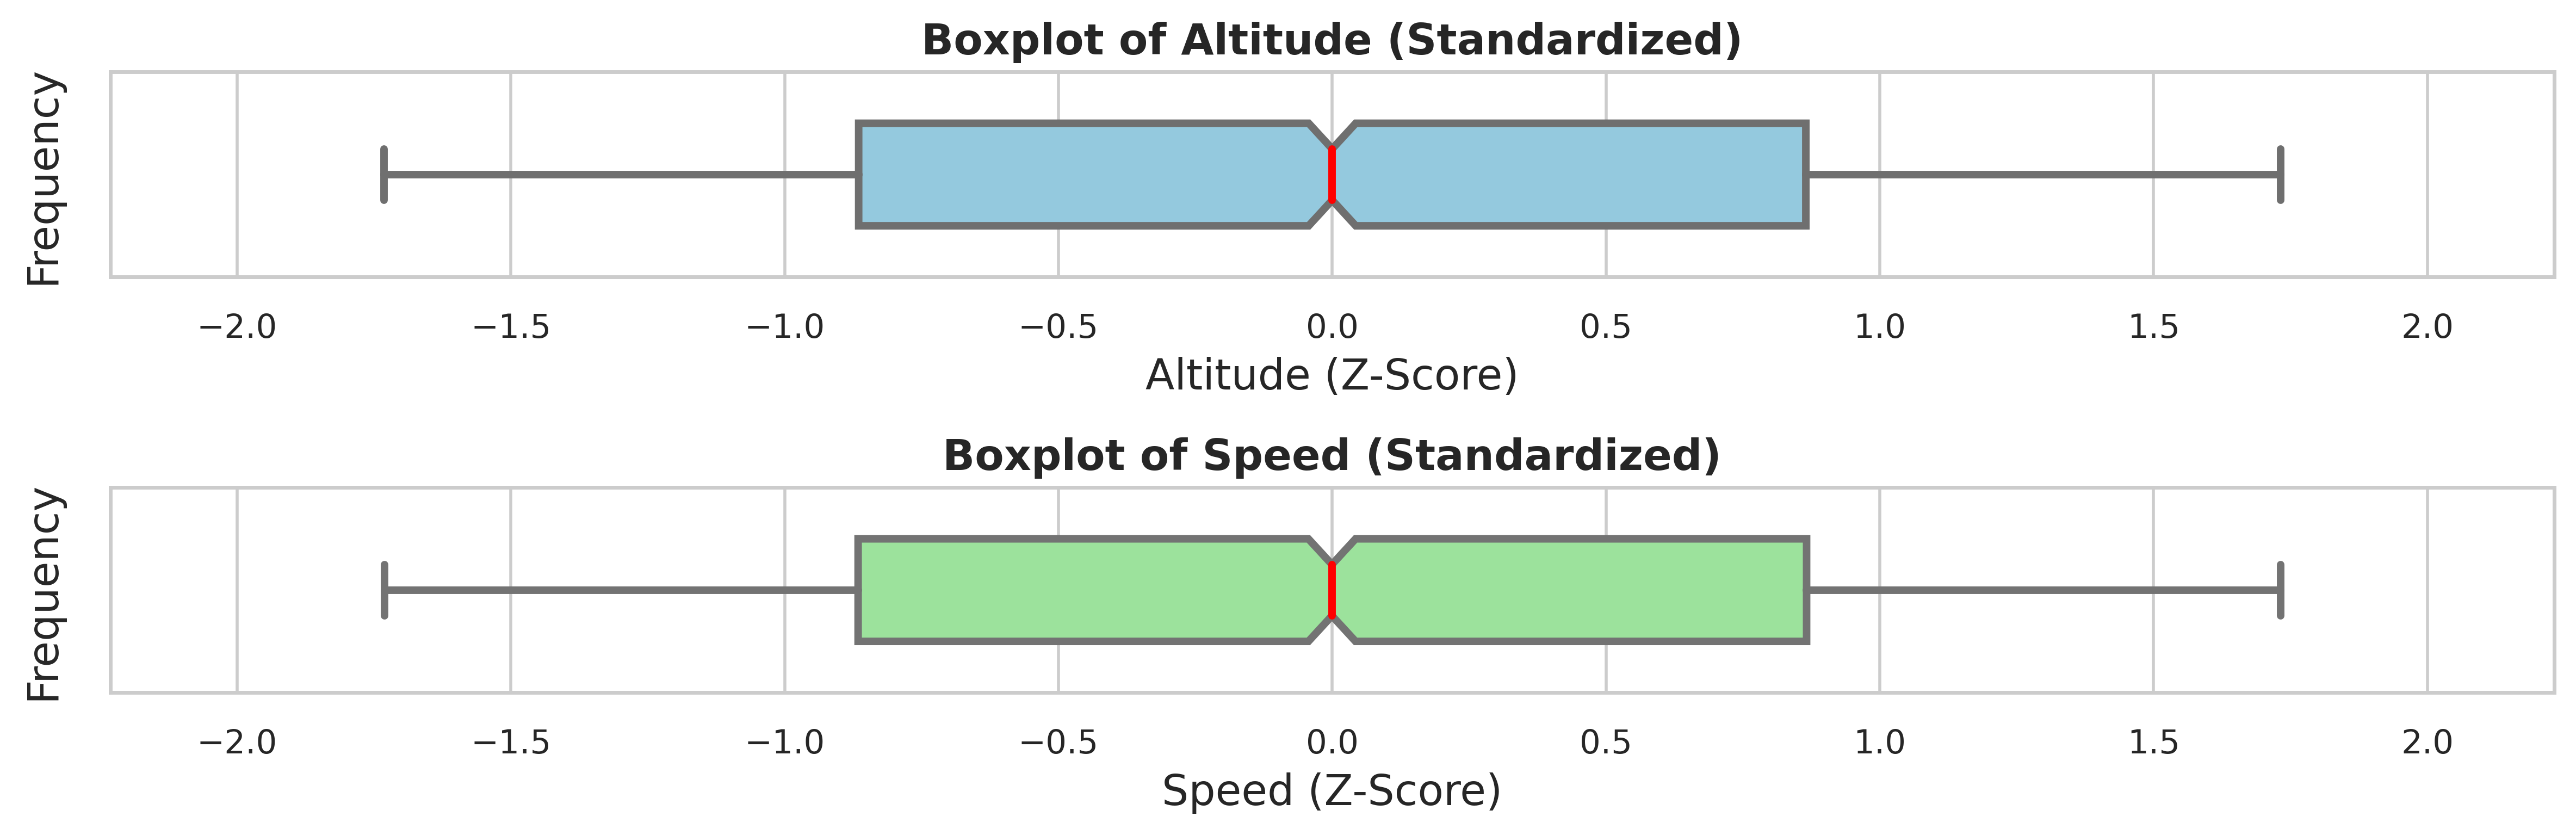

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt

# Definindo o estilo do gráfico
# sns.set(style="whitegrid")

# Criando uma nova figura para os boxplots
plt.figure(figsize=(12, 4))

medianprops = dict(linestyle='-', linewidth=2.5, color='red')

min_value = min(_df_nav["speed_without_mean_div_std"].min() - 0.5, _df_nav["altitude_without_mean_div_std"].min() - 0.5)
max_value = max(_df_nav["speed_without_mean_div_std"].max() + 0.5, _df_nav["altitude_without_mean_div_std"].max() + 0.5)

# Criando o boxplot para altitude_without_mean_div_std
plt.subplot(2, 1, 1)  # 1 linha, 2 colunas, posição 2
sns.boxplot(x=_df_nav["altitude_without_mean_div_std"], width=0.5, fliersize=5, linewidth=2.5, notch=True, color="skyblue", medianprops=medianprops)
plt.title('Boxplot of Altitude (Standardized)', fontsize=14, fontweight='bold')
plt.xlim(min_value, max_value)  # Definindo os mesmos limites para o eixo x
plt.xlabel("Altitude (Z-Score)", fontsize=14)
plt.ylabel("Frequency", fontsize=14)

# Criando o boxplot para speed_without_mean_div_std
plt.subplot(2, 1, 2)  # 1 linha, 2 colunas, posição 1
sns.boxplot(x=_df_nav["speed_without_mean_div_std"], width=0.5, fliersize=5, linewidth=2.5, notch=True, color="lightgreen", medianprops=medianprops)
plt.title('Boxplot of Speed (Standardized)', fontsize=14, fontweight='bold')
plt.xlim(min_value, max_value)  # Definindo os mesmos limites para o eixo x
plt.xlabel("Speed (Z-Score)", fontsize=14)
plt.ylabel("Frequency", fontsize=14)

# Mostrando o gráfico
plt.tight_layout()
plt.savefig('boxplot2.png')
plt.show()

## EXPERIMENTO 1: Previsão do Consumo de Combustível na rota específica

#### Rede Neural

In [45]:
start_time_1 = time()

In [46]:
nn_nav = asapy.NeuralNetwork(target="fuel_consumed", name='demo_nn_nav', seed=25)

In [47]:
nn_nav.build(
    df_nav,
    task="regression",
    max_cat_nunique = 10,
    split_size = (0.7, 0.15, 0.15),
    info=True,
    patience_early_stopping = 20,
    patience_reduceLR = 4,
    metrics=['rmse']
)


                Task: regression

                Total of registers: 3990
                Total of valid registers: 3990
                Total of invalid registers: 0

                Total of training registers: 2792
                Total of validation registers: 599
                Total of test registers: 599

                Features before preprocessing: 2
                Features after preprocessing: 2

                Numerical Features: ['speed', 'altitude']
                Categorical Features: []
                Categorical Features removed due to high cardinality: []

                Target: ['fuel_consumed']
            


In [48]:
nn_nav.hyperparameter_optimization(
    n_trials=18,
    num_folds=4,
    info=True,
    search_space_dropout = [0.0, 0.5],
    search_space_layers = [2, 3, 4],
    search_space_batch_size = [32, 64, 128],
    search_space_optimizer = ['Adam']
)

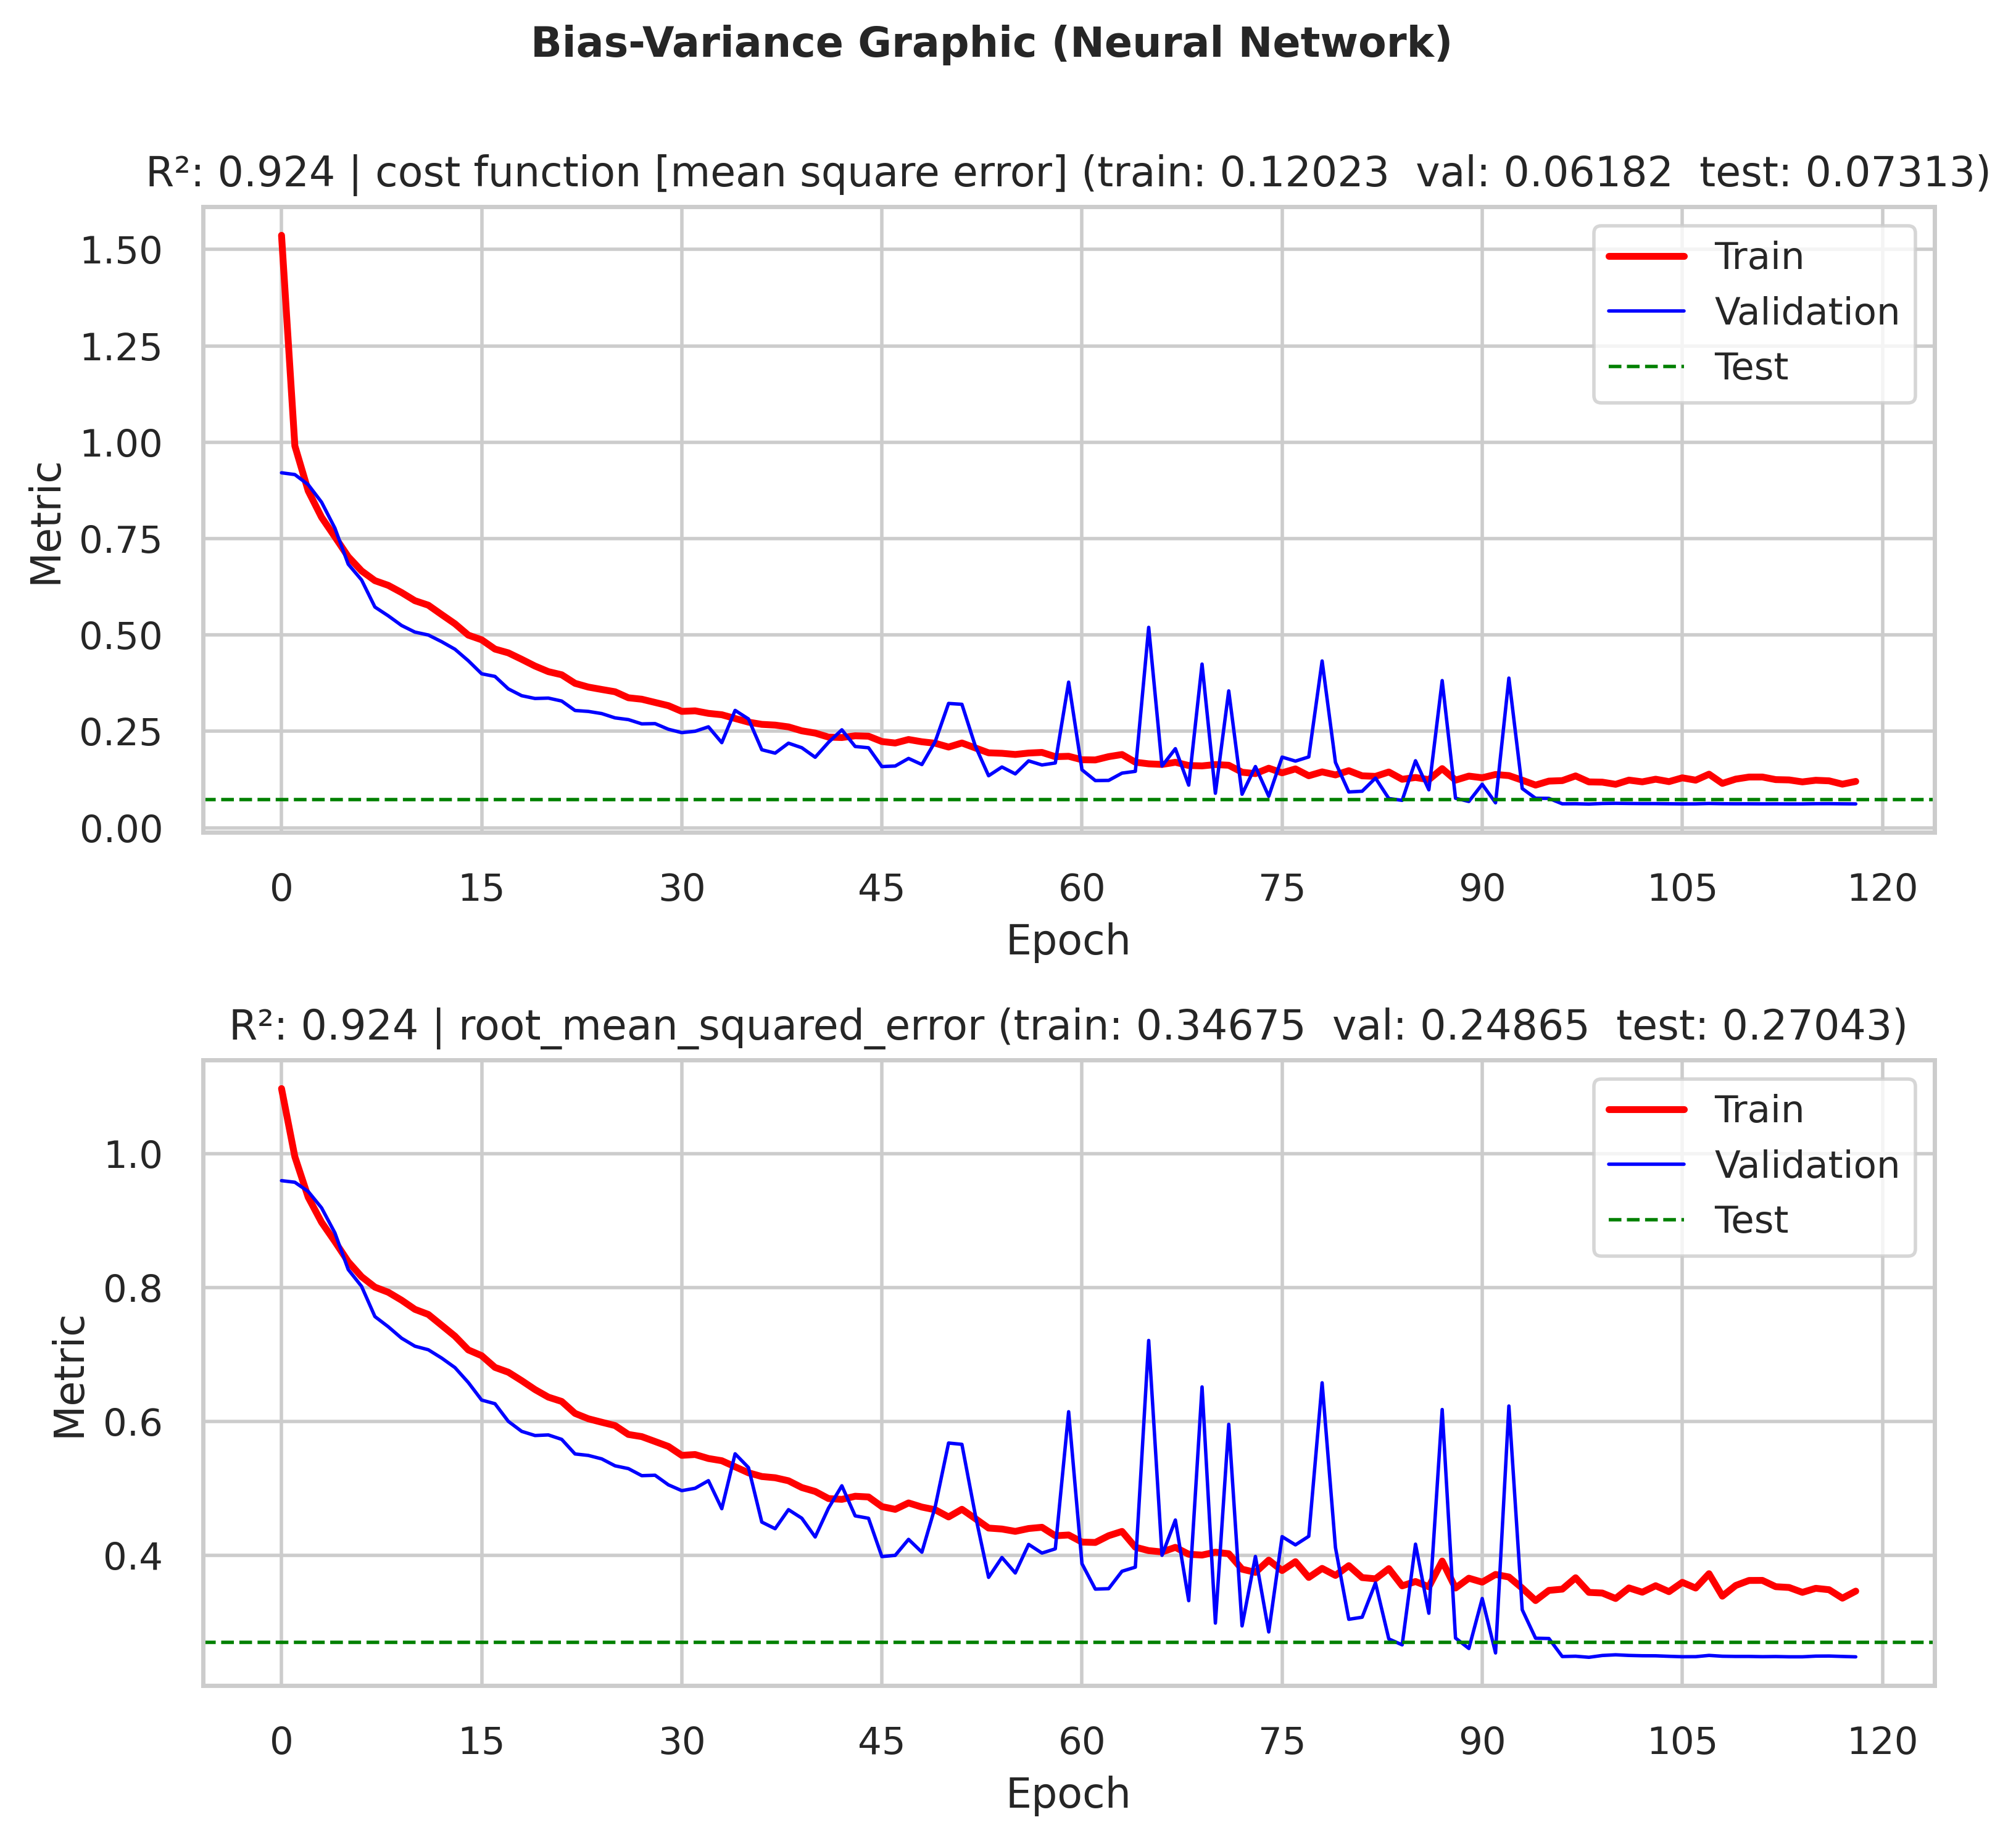

In [49]:
nn_nav.fit(return_history=False, graphic=True, graphic_save_extension='png', verbose=0)

In [50]:
end_time_1 = time()

In [51]:
start_time_2 = time()

In [52]:
pred_nn_nav = nn_nav.predict(sample_nav, verbose=0)

Inference time: 87.94 milliseconds (10 register(s))


In [53]:
pred_nn_nav

speed  altitude  fuel_consumed  fuel_consumed (NN prediction)
experiment                                                                
3469        486.39  10926.35    1581.834614                    1521.674316
78          386.87  14677.90    1088.603860                    1099.717529
1315        527.13  30900.45     915.092869                     914.000610
3600        467.27  29628.52     866.542055                     914.000610
3002        492.50  32162.02     895.293961                     914.000610
2500        505.93  31161.69     896.343679                     914.000610
3335        498.37  13909.26    1458.987887                    1446.617065
2941        447.29  11838.45    1366.950858                    1383.579346
3256        410.45  22475.32    1016.116438                    1024.257324
1965        373.46  26776.07     982.363799                    1003.666016

In [54]:
end_time_2 = time()

In [55]:
print(f"Tempo de Treinamento: {end_time_1 - start_time_1}")

Tempo de Treinamento: 1486.5074634552002


In [56]:
print(f"Tempo de Inferência: {end_time_2 - start_time_2}")

Tempo de Inferência: 0.15073895454406738


#### XG Boost

In [57]:
start_time_3 = time()

In [58]:
xgb_nav = asapy.XgBoost(target="fuel_consumed", name='demo_xgb_nav', seed=25)

In [59]:
xgb_nav.build(
    df_nav,
    task="regression",
    num_folds=5,
    max_cat_nunique = 10,
    split_size = (0.7, 0.15, 0.15),
    info=True,
    patience_early_stopping = 20,
    metrics=['mse']
)


                Task: regression

                Total of registers: 3990
                Total of valid registers: 3990
                Total of invalid registers: 0

                Total of training registers: 2792
                Total of validation registers: 599
                Total of test registers: 599

                Features before preprocessing: 2
                Features after preprocessing: 2

                Numerical Features: ['speed', 'altitude']
                Categorical Features: []
                Categorical Features removed due to high cardinality: []

                Target: ['fuel_consumed']
            


In [61]:
# xgb_nav.hyperparameter_optimization(
#     n_trials=10,
#     num_folds = 5, 
#     info=True,
#     search_space_tree_method = ['auto'],
#     search_space_booster = ['gbtree', 'gblinear', 'dart'],
#     search_space_learning_rate = [0.3],
#     search_space_min_split_loss = [0],
#     search_space_max_depth = [6],
#     search_space_min_child_weight = [1],
#     search_space_max_delta_step = [0],
#     search_space_subsample = [1],
#     search_space_sampling_method = ['uniform'],
#     search_space_colsample_bytree = [1],
#     search_space_colsample_bylevel = [1],
#     search_space_colsample_bynode = [1],
#     search_space_reg_lambda = [1],
#     search_space_reg_alpha = [0],
#     search_space_scale_pos_weight = [1],
#     search_space_grow_policy = ['depthwise'],
#     search_space_max_leaves = [0],
#     search_space_max_bin = [256],
#     search_space_num_parallel_tree = [1]
# )

In [ ]:
history_xgb_nav = xgb_nav.fit(return_history=True, graphic=True, graphic_save_extension='png', verbose=0)

In [ ]:
end_time_3 = time()

In [ ]:
start_time_4 = time()

In [ ]:
pred_xgb_nav = xgb_nav.predict(sample_nav)

In [ ]:
pred_xgb_nav

In [ ]:
end_time_4 = time()

In [ ]:
print(f"Tempo de Treinamento: {end_time_3 - start_time_3}")

In [ ]:
print(f"Tempo de Inferência: {end_time_4 - start_time_4}")

## EXPERIMENTO 2: Segmentação de classe de Combustível na rota específica

#### KMeans

In [62]:
start_time_5 = time()

In [63]:
kmeans_nav = asapy.KMeans(name='demo_kmeans_nav', seed=25)

In [64]:
kmeans_nav.build(df_nav, info=True)


                Total of registers: 3990
                Total of valid registers: 3990
                Total of invalid registers: 0

                Total of Features: 3
                Numerical Features: ['speed', 'altitude', 'fuel_consumed']
                Categorical Features: []
                Categorical Features removed due to high cardinality: []
            


In [65]:
kmeans_nav.hyperparameter_optimization(
    n_trials=10,
    info=True,
    search_space_n_clusters=[4],
    search_space_init  = ['k-means++'],
    search_space_n_init = ['auto'],
    search_space_tol = [1e-5, 1e-4, 1e-3],
    search_space_algorithm = ['lloyd', 'elkan']
)

Trial (nº)  Silhouette Score params_algorithm params_init  \
Ranking                                                              
1º                0          0.394386            elkan   k-means++   
2º                2          0.394386            elkan   k-means++   
3º                1          0.394380            lloyd   k-means++   
4º                7          0.394380            lloyd   k-means++   
5º                8          0.394380            lloyd   k-means++   
6º                9          0.394380            elkan   k-means++   
7º                3          0.394375            lloyd   k-means++   
8º                4          0.394375            lloyd   k-means++   
9º                5          0.394375            lloyd   k-means++   
10º               6          0.394375            lloyd   k-means++   

         params_n_clusters params_n_init  params_tol  
Ranking                                               
1º                       4          auto     0.00100  
2º                       4          auto     0.00100  
3º                       4          auto     0.00010  
4º                       4          auto     0.00010  
5º                       4          auto     0.00010  
6º                       4          auto     0.00010  
7º                       4          auto     0.00001  
8º                       4          auto     0.00001  
9º                       4          auto     0.00001  
10º                      4          auto     0.00001

In [66]:
clusters = kmeans_nav.fit(return_cluster=True)

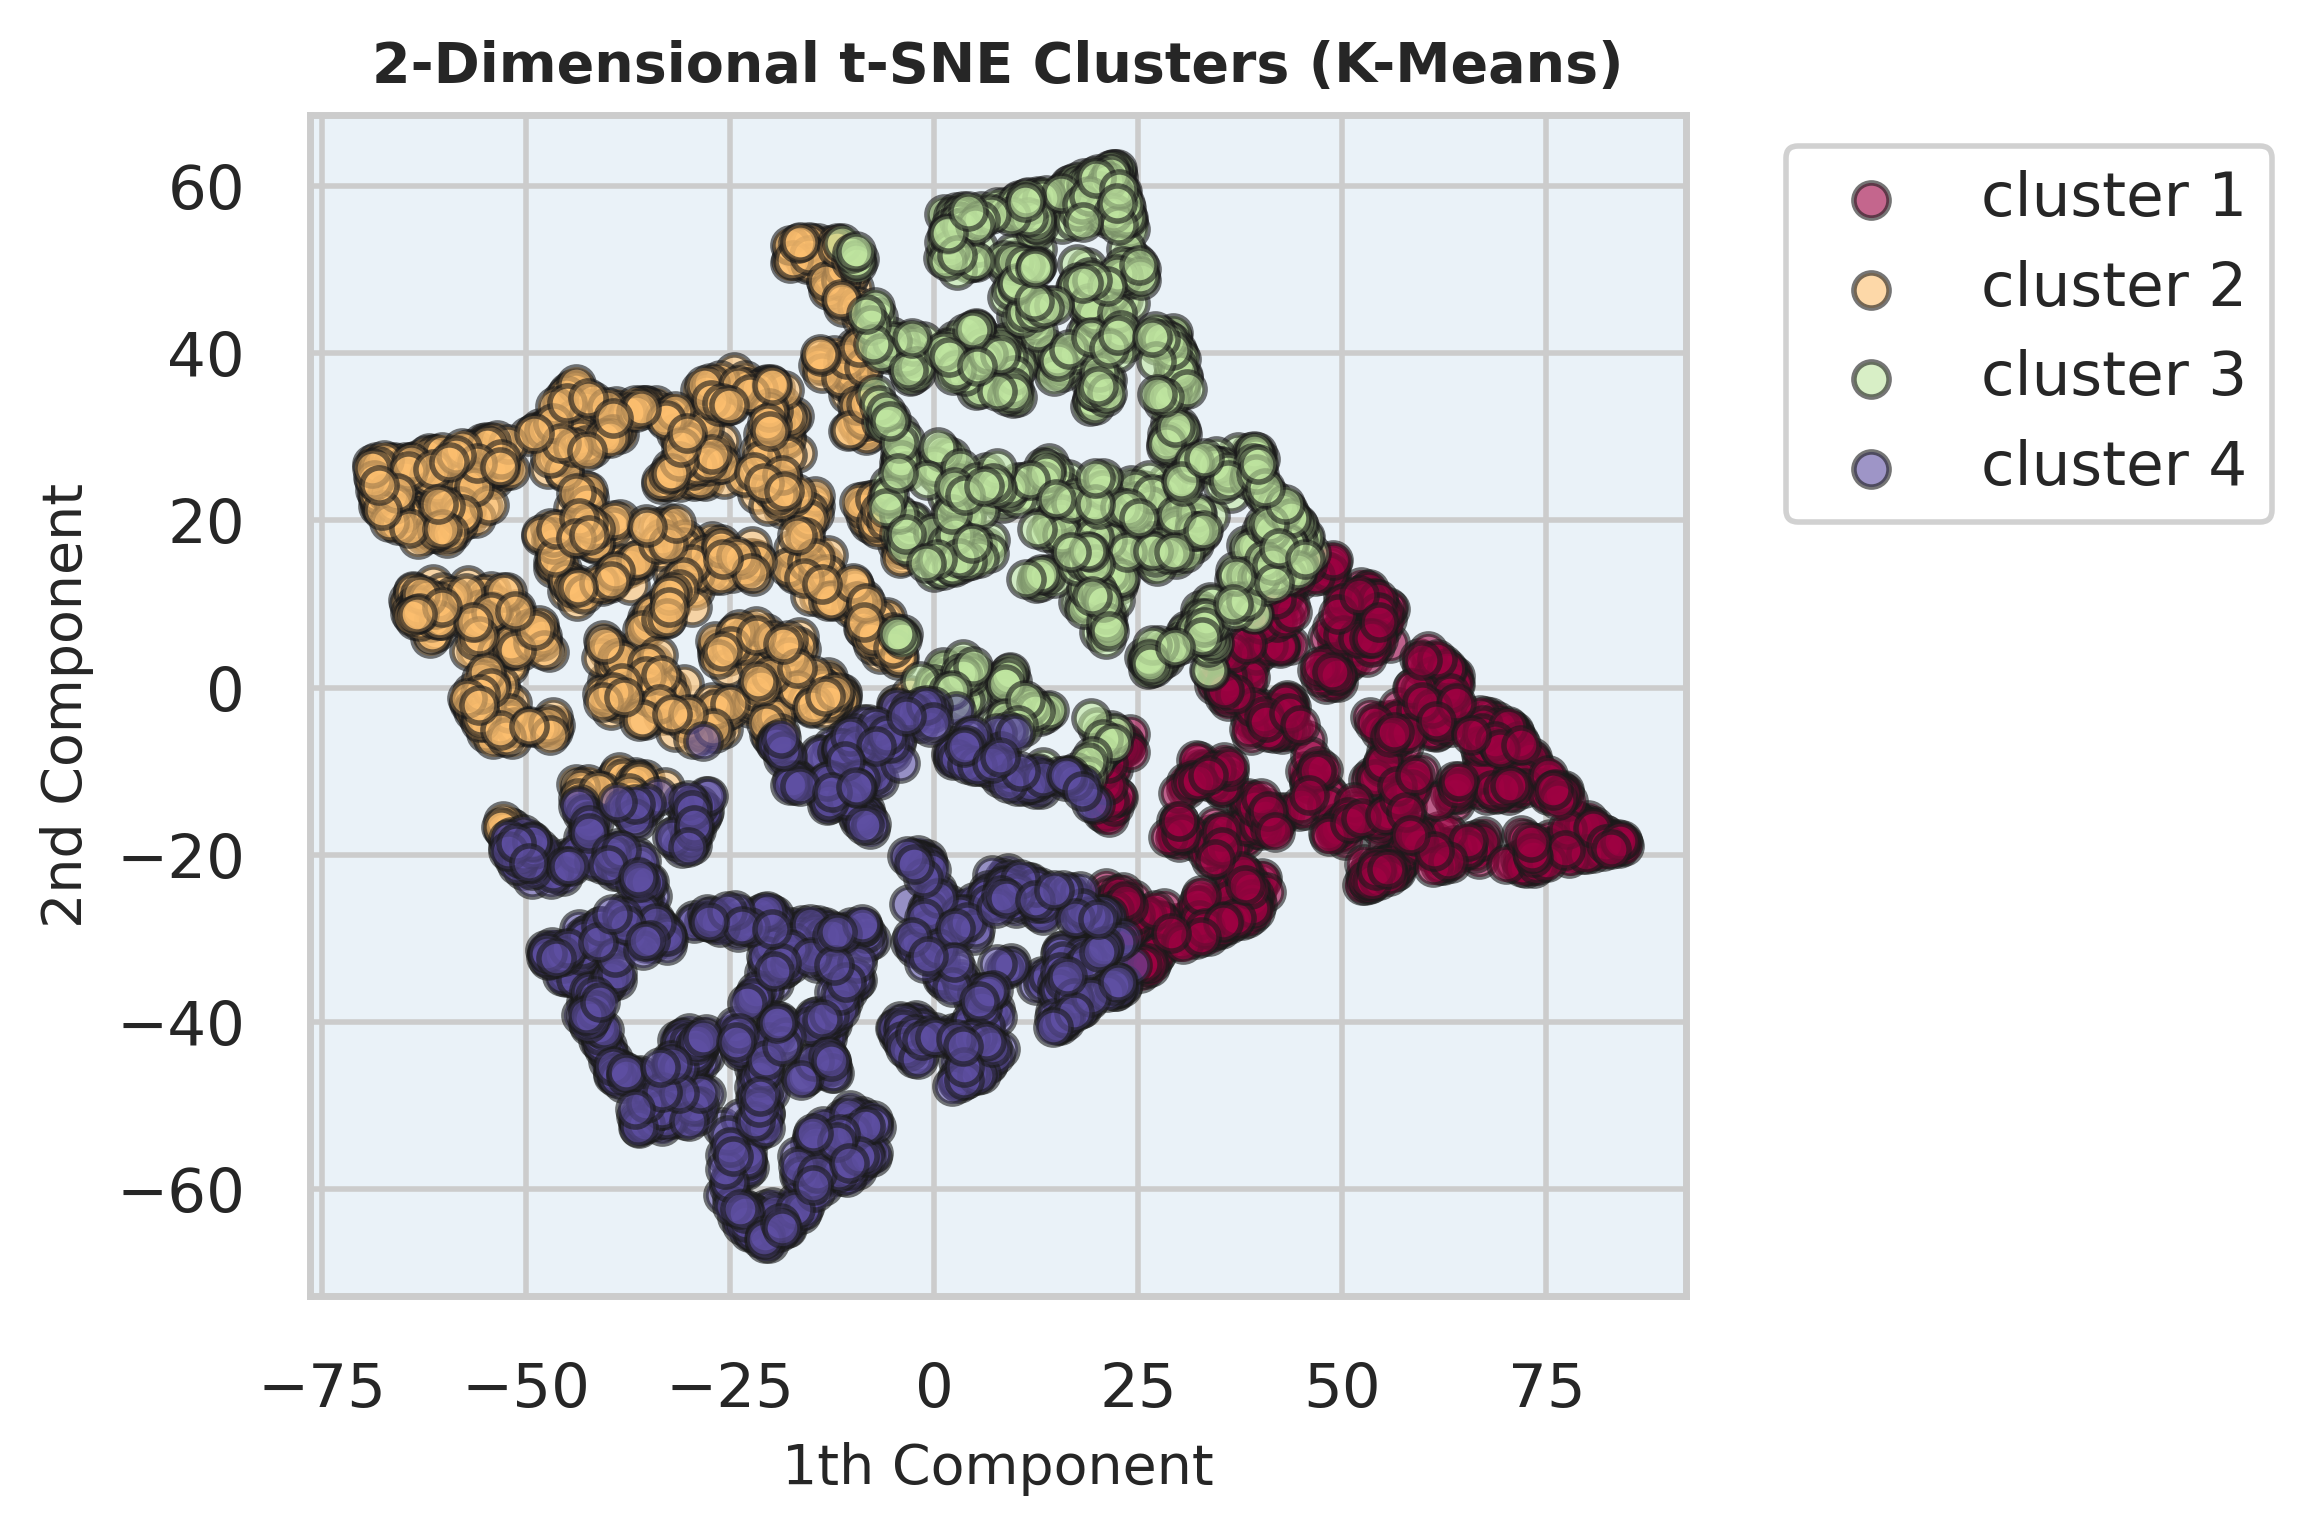

In [67]:
kmeans_nav.predict(projection='2d', graphic_save_extension='png')

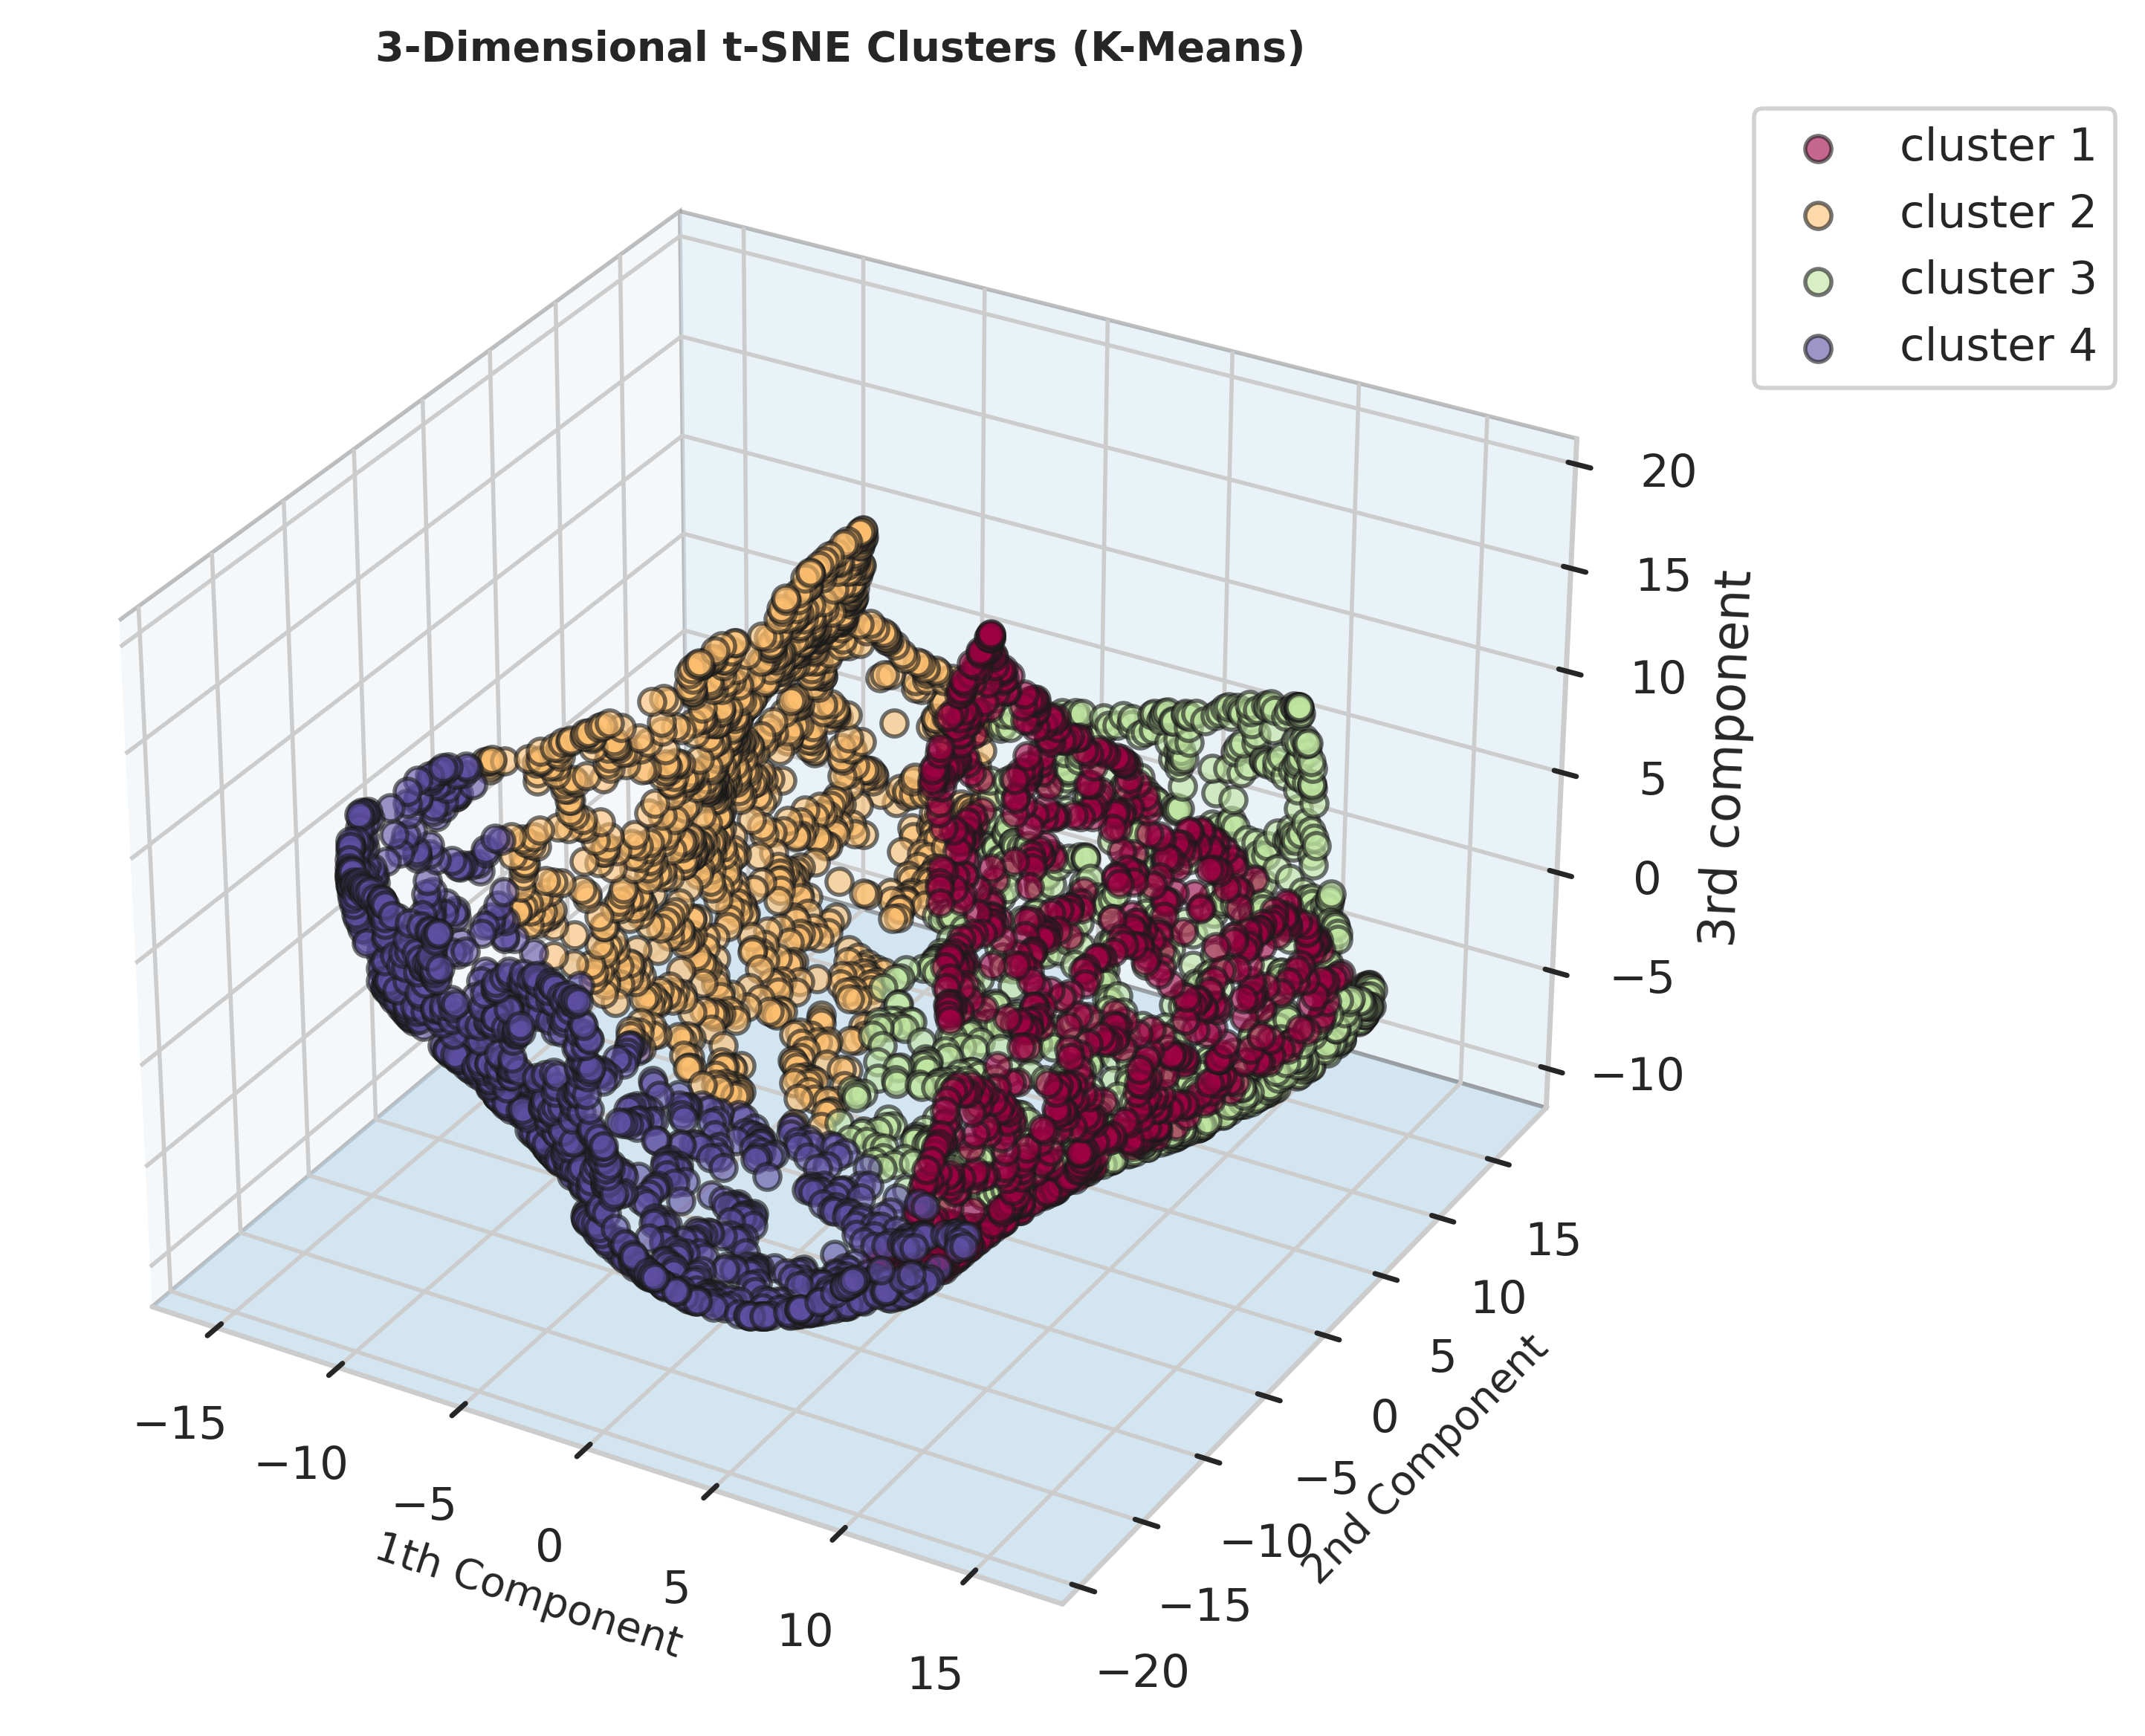

In [68]:
kmeans_nav.predict(projection='3d', graphic_save_extension='png')

In [69]:
end_time_5 = time()

In [70]:
print(f"Tempo de Treinamento: {end_time_5 - start_time_5}")

Tempo de Treinamento: 60.359888553619385


## EXPERIMENTO 3: Previsão da classe de Consumo de Combustível na rota específica

#### Data leak intencional, com o intuito de criar um Case de classificação. Asuma que a nfomação do cluster seja obtida de observação factual

In [71]:
df_nav_class = df_nav.copy()
df_nav_class['Cluster'] = clusters

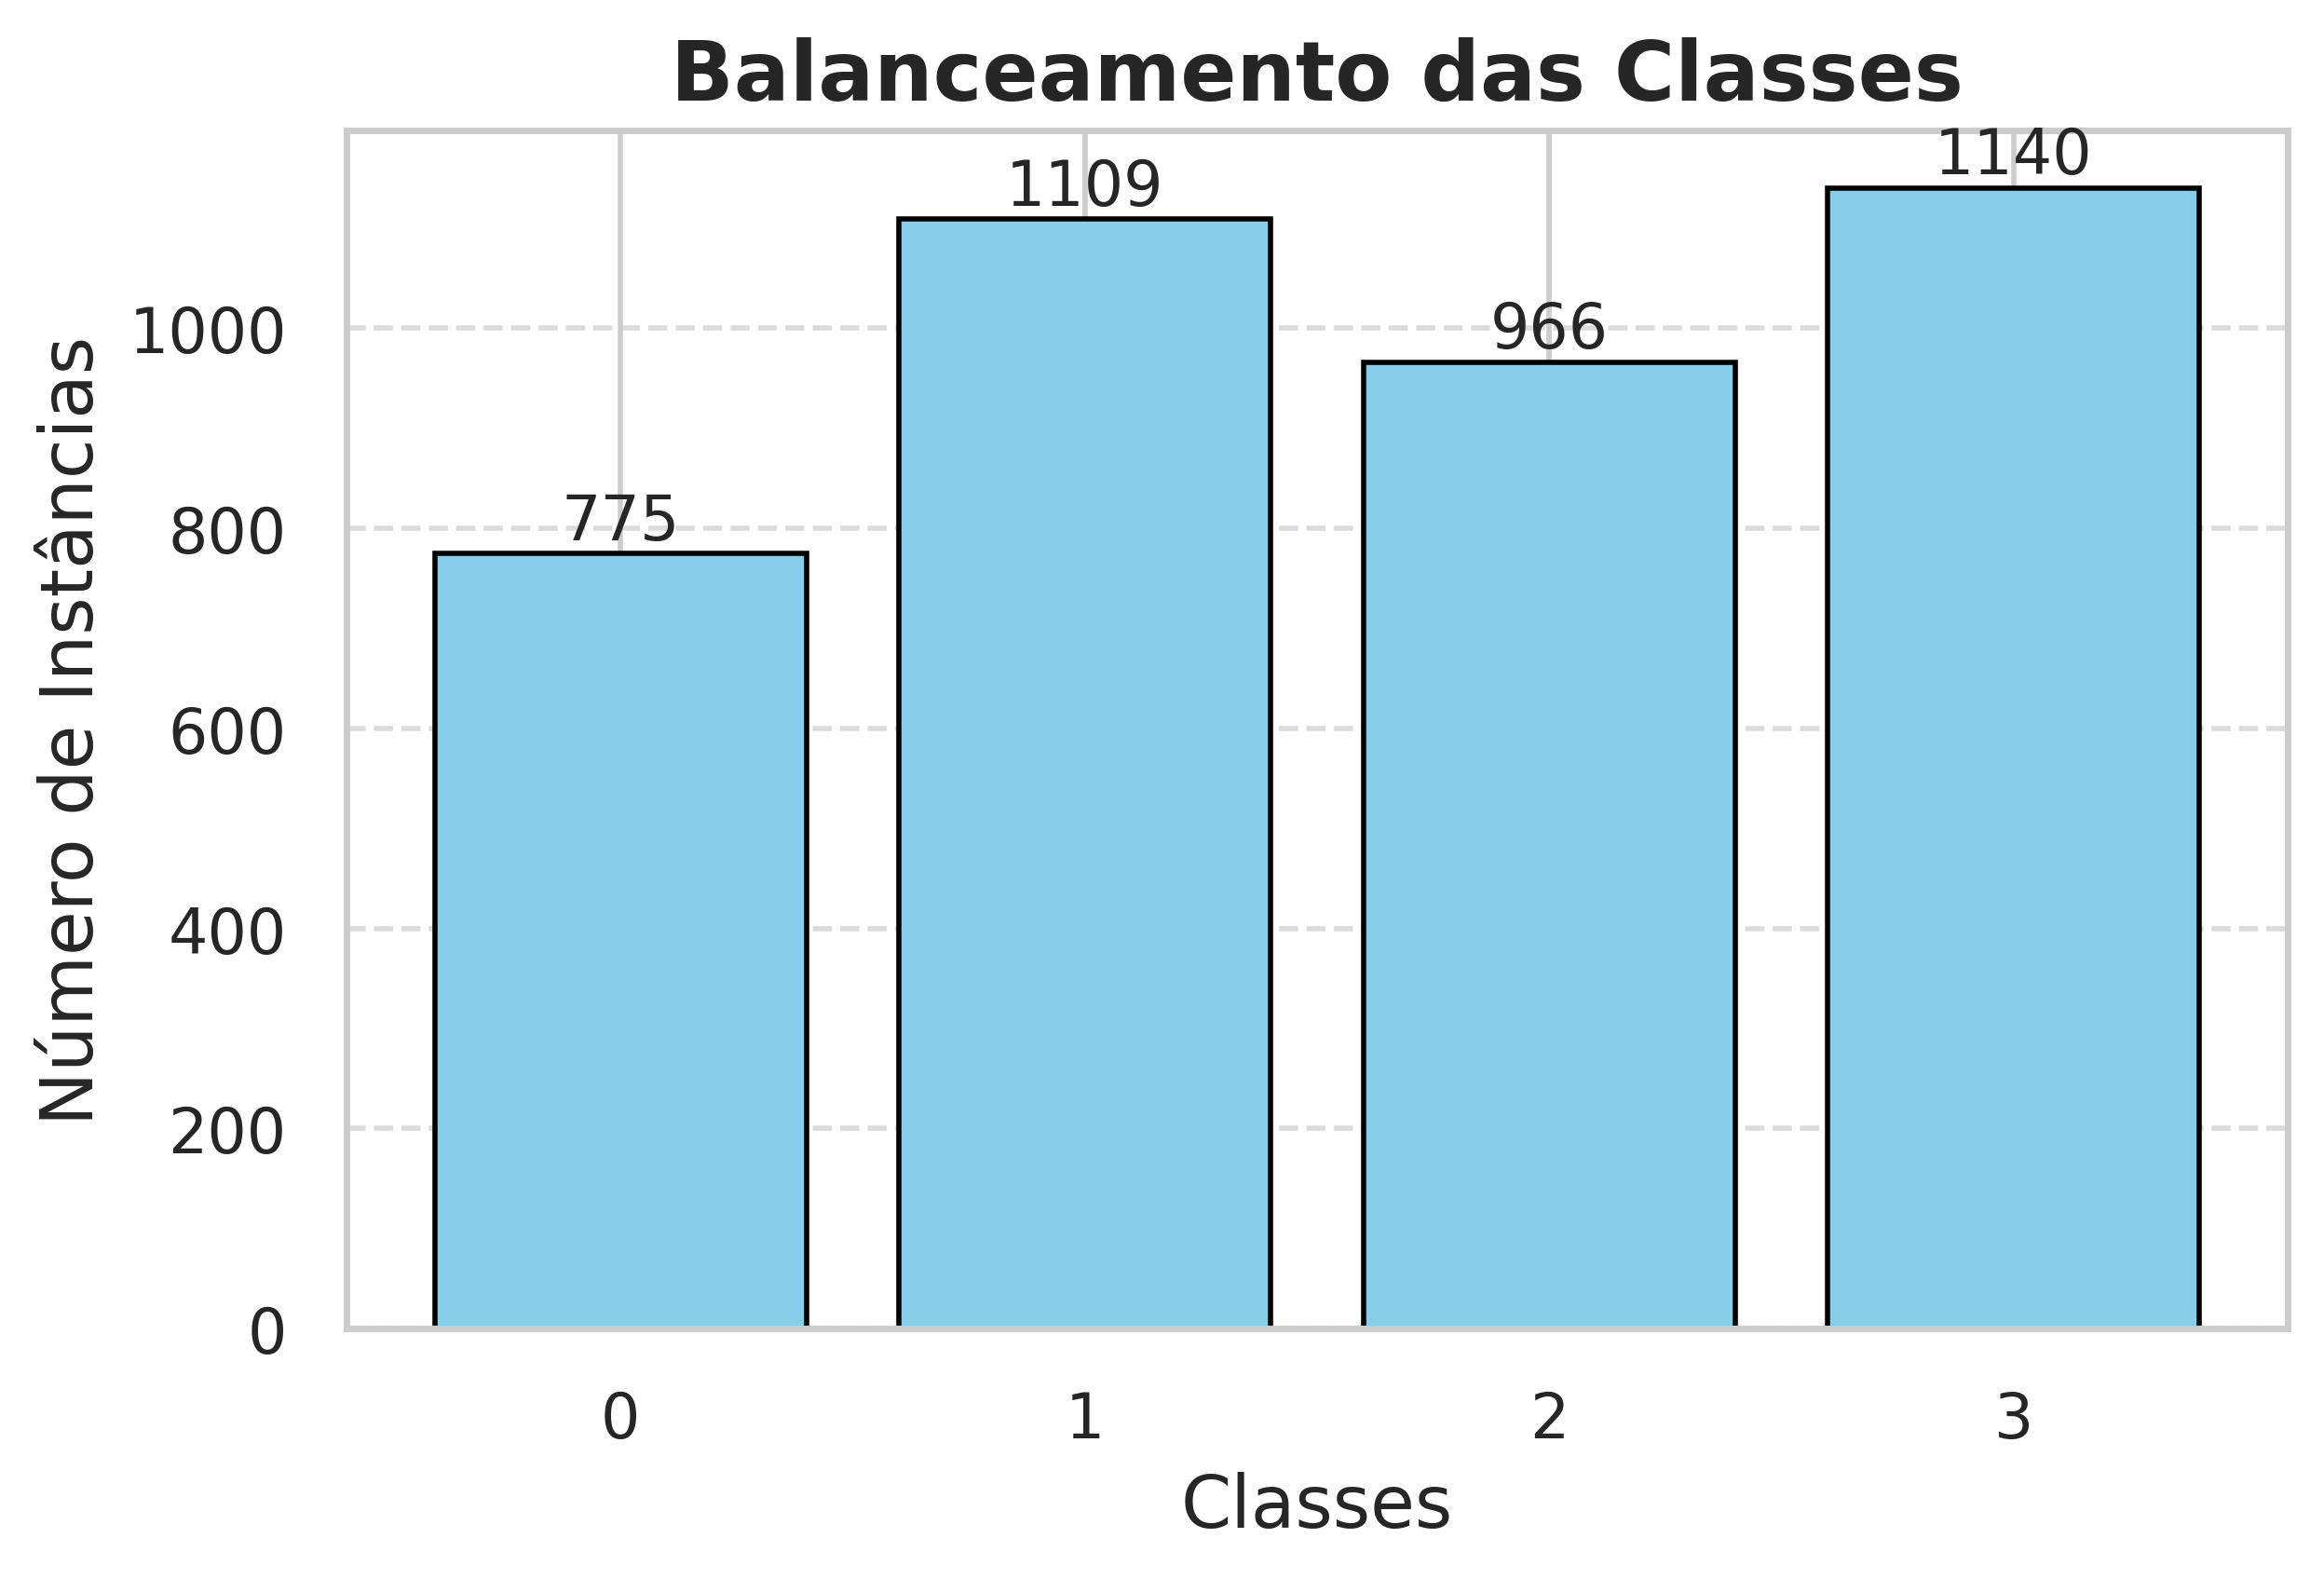

In [72]:
# plt.style.use('seaborn-darkgrid')  # Usa um estilo de fundo do Seaborn
# plt.figure(figsize=(10, 6))  # Tamanho do gráfico

class_counts = df_nav_class['Cluster'].value_counts().sort_index()

bars = plt.bar(class_counts.index, class_counts.values, color='skyblue', edgecolor='black')

plt.title('Balanceamento das Classes', fontsize=16, fontweight='bold')
plt.xlabel('Classes', fontsize=14)
plt.ylabel('Número de Instâncias', fontsize=14)

plt.xticks(class_counts.index, fontsize=12)
plt.yticks(fontsize=12)

plt.grid(axis='y', linestyle='--', alpha=0.7)

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 1, int(yval), ha='center', va='bottom', fontsize=12)

plt.tight_layout()
plt.show()

In [73]:
# !pip install imblearn

In [74]:
from imblearn.over_sampling import SMOTE
from collections import Counter

sm = SMOTE(random_state=42)
X = df_nav_class.drop('Cluster', axis=1)
y = df_nav_class['Cluster']

X_res, y_res = sm.fit_resample(X, y)

# Se precisar, converta de volta para DataFrame pandas
df_nav_class = pd.DataFrame(X_res, columns=X.columns)
df_nav_class['Cluster'] = y_res

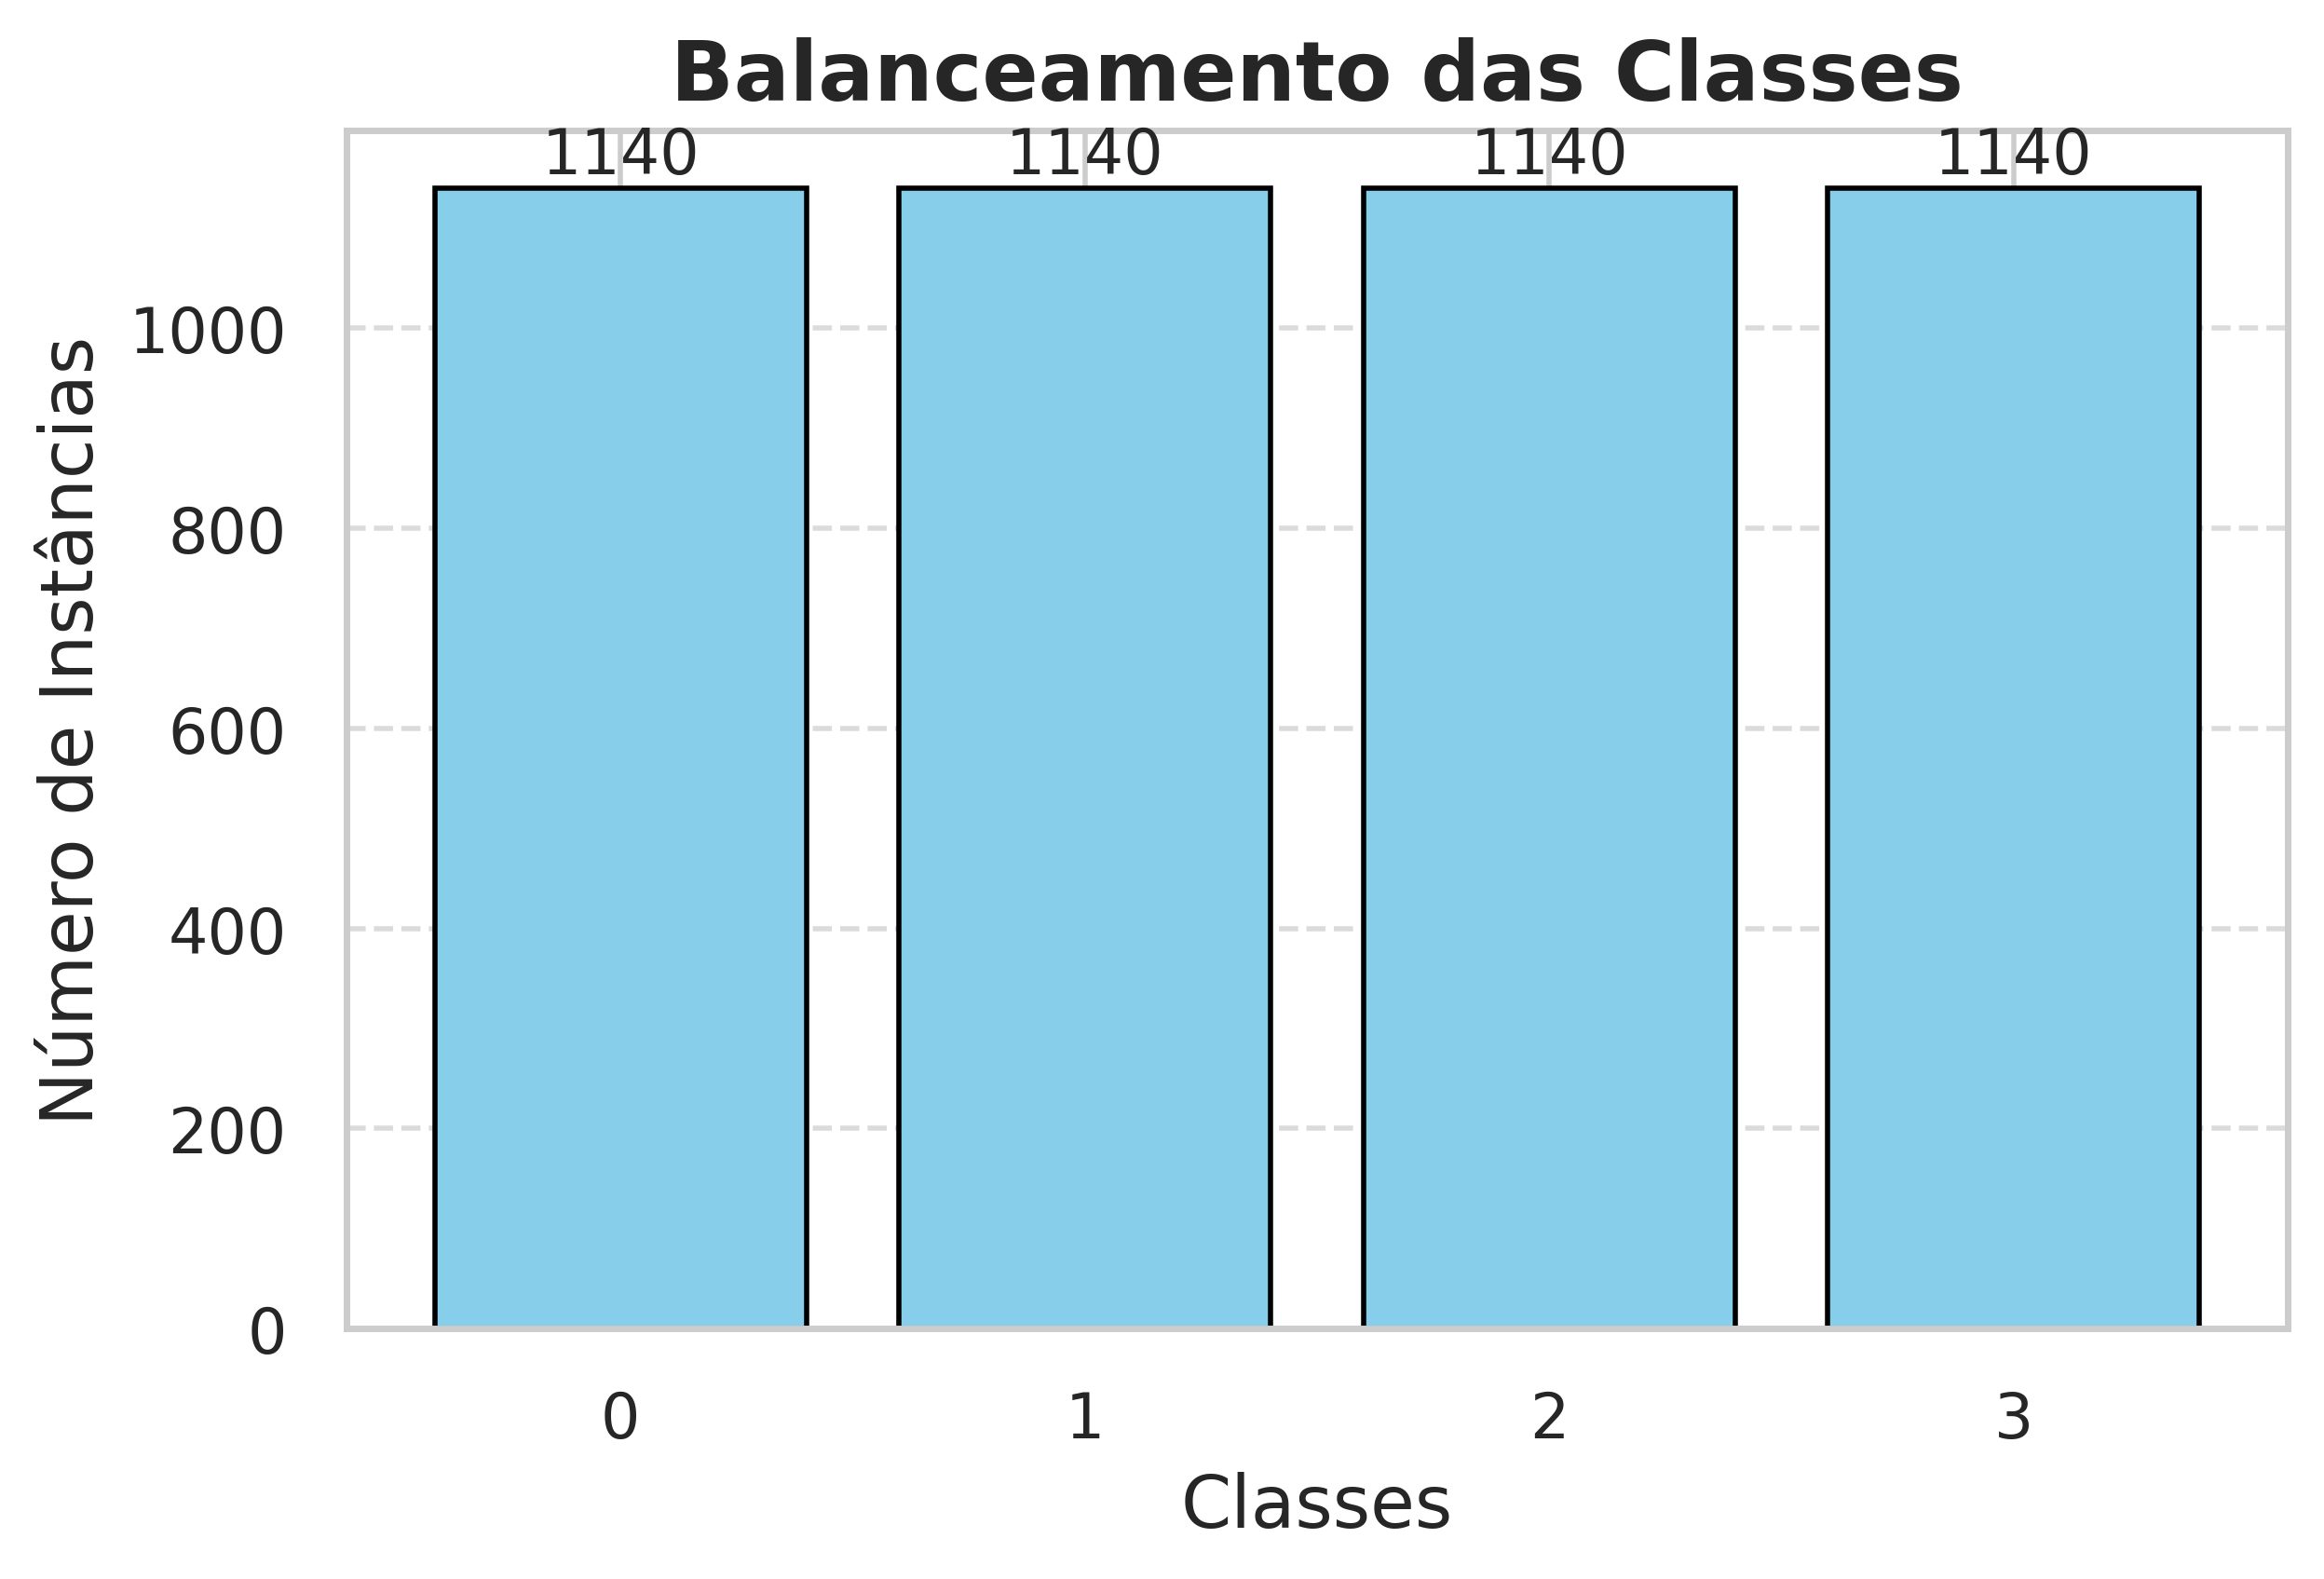

In [75]:
# plt.style.use('seaborn-darkgrid')  # Usa um estilo de fundo do Seaborn
# plt.figure(figsize=(10, 6))  # Tamanho do gráfico

class_counts = df_nav_class['Cluster'].value_counts().sort_index()

bars = plt.bar(class_counts.index, class_counts.values, color='skyblue', edgecolor='black')

plt.title('Balanceamento das Classes', fontsize=16, fontweight='bold')
plt.xlabel('Classes', fontsize=14)
plt.ylabel('Número de Instâncias', fontsize=14)

plt.xticks(class_counts.index, fontsize=12)
plt.yticks(fontsize=12)

plt.grid(axis='y', linestyle='--', alpha=0.7)

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 1, int(yval), ha='center', va='bottom', fontsize=12)

plt.tight_layout()
plt.show()

In [76]:
sample_nav_class = df_nav_class.sample(10)
df_nav_class = df_nav_class.loc[~df_nav_class.index.isin(sample_nav_class.index)]

#### Rede Neural

In [77]:
start_time_6 = time()

In [78]:
nn_nav_class = asapy.NeuralNetwork(target="Cluster", name='demo_nn_nav_class', seed=25)

In [79]:
nn_nav_class.build(
    df_nav_class,
    task='classification',
    max_cat_nunique = 10,
    split_size = (0.7, 0.15, 0.15),
    info=True,
    patience_early_stopping = 20,
    patience_reduceLR = 4,
    metrics=['auc', 'precision', 'recall', 'accuracy'] 
)


                Task: classification

                Total of registers: 4550
                Total of valid registers: 4550
                Total of invalid registers: 0

                Total of training registers: 3184
                Total of validation registers: 683
                Total of test registers: 683

                Features before preprocessing: 3
                Features after preprocessing: 3

                Numerical Features: ['speed', 'altitude', 'fuel_consumed']
                Categorical Features: []
                Categorical Features removed due to high cardinality: []

                Target: ['Cluster']
            	Cardinality (Target): 4


In [80]:
nn_nav_class.hyperparameter_optimization(
    n_trials=10,
    num_folds=5,
    info=True,
    search_space_dropout = [0.0, 0.5],
    search_space_layers = [2, 3, 4],
    search_space_batch_size = [32, 64],
    search_space_optimizer = ['Adam']
)

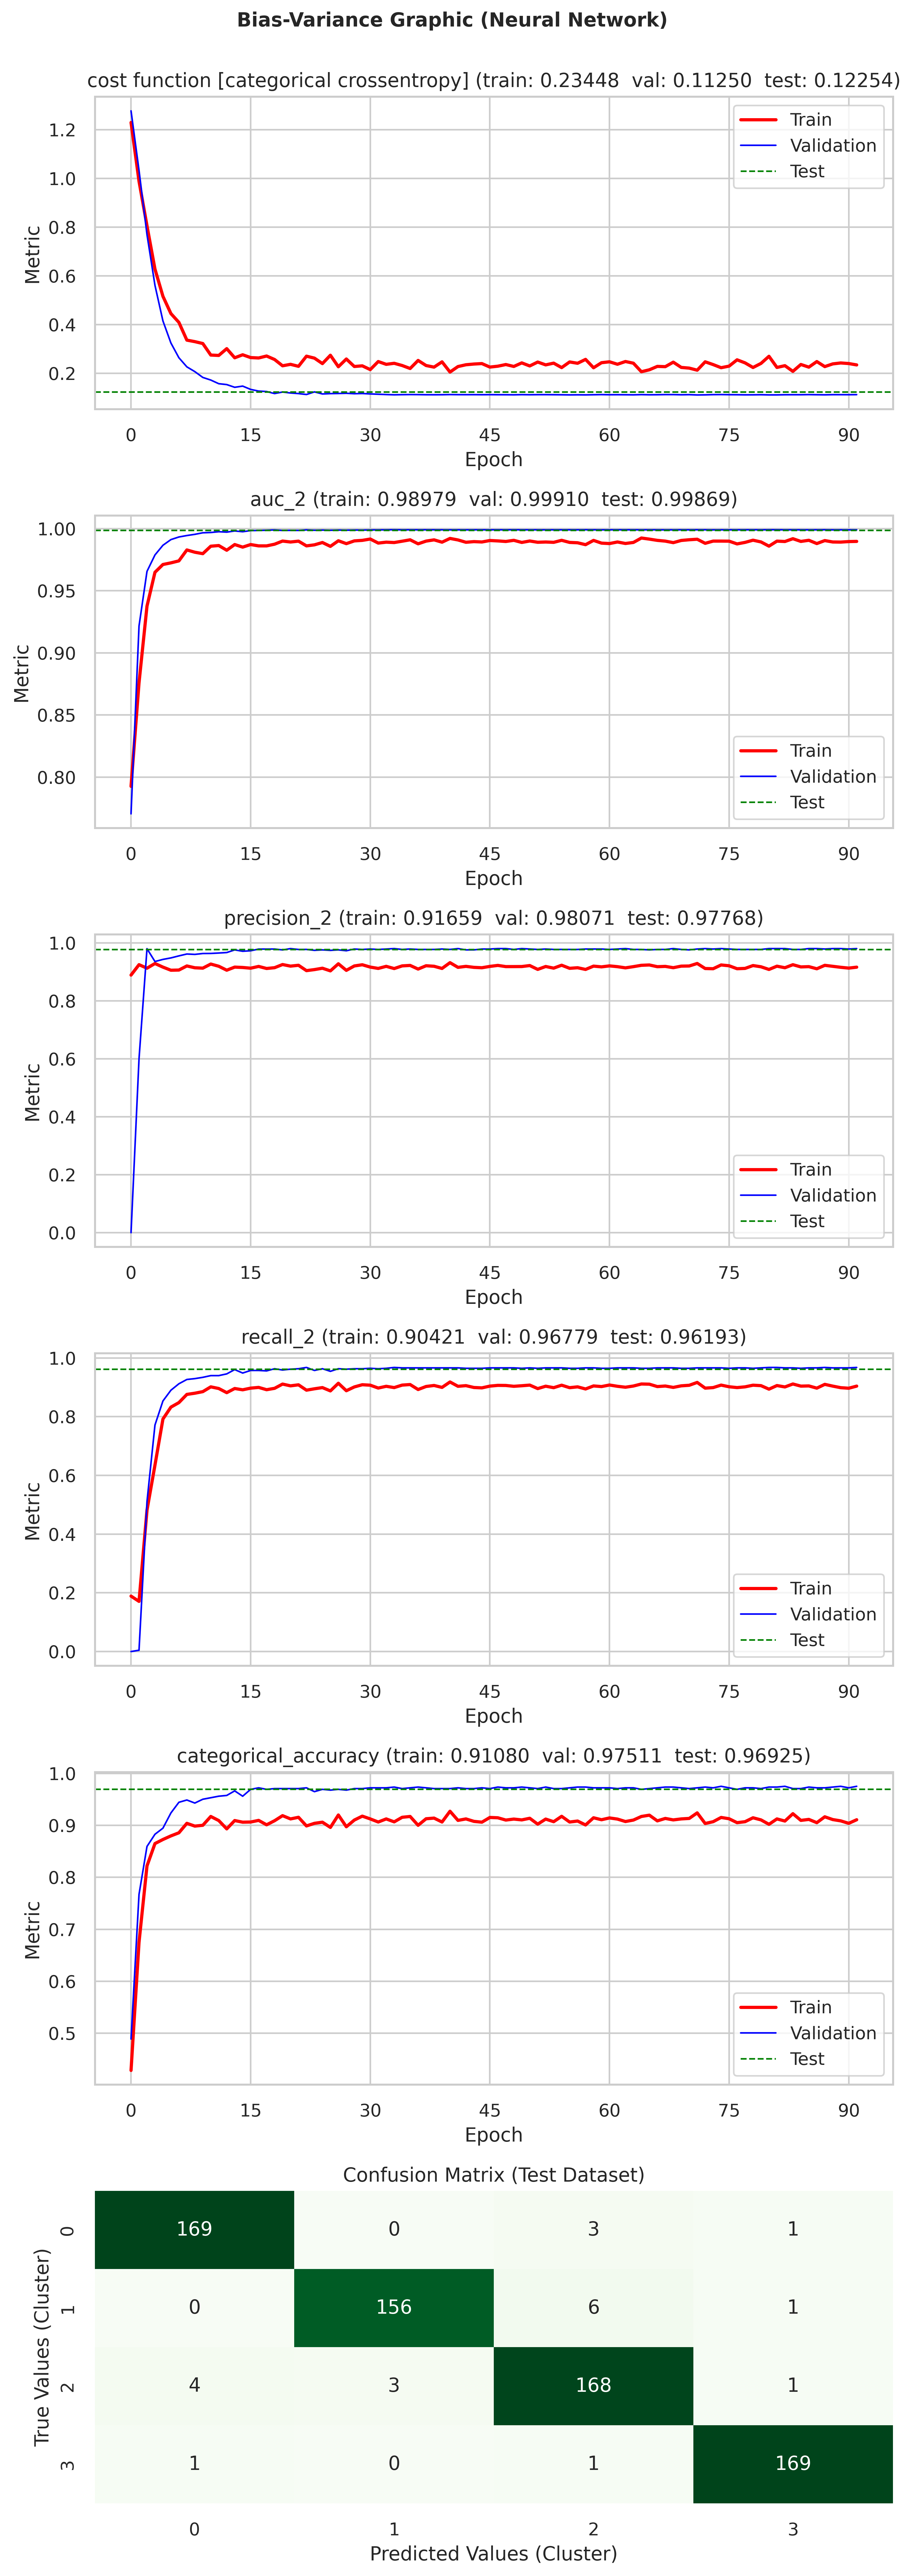

In [81]:
history_nn_nav_class = nn_nav_class.fit(return_history=True, graphic=True, graphic_save_extension='png', verbose=0)

In [82]:
end_time_6 = time()

In [83]:
start_time_7 = time()

In [84]:
pred_nn_nav_class = nn_nav_class.predict(sample_nav_class, verbose=0)

Inference time: 87.69 milliseconds (10 register(s))


In [85]:
pred_nn_nav_class

speed      altitude  fuel_consumed  Cluster  \
1335  533.100000  23634.520000    1137.071120        3   
3467  383.790000  34491.820000    1115.915485        1   
1495  540.500000  19508.770000    1325.789589        0   
4444  403.354165  18522.930382    1043.113675        2   
3893  402.760000  32506.950000    1038.137185        1   
3508  360.540000  22564.000000    1010.935314        1   
602   373.870000  19953.350000     950.877943        1   
354   393.070000  11328.430000    1169.989570        2   
1044  407.710000  21420.030000    1015.286528        1   
2101  384.630000  23952.480000     989.811041        1   

      Cluster (NN prediction)  
1335                        3  
3467                        1  
1495                        0  
4444                        2  
3893                        1  
3508                        1  
602                         2  
354                         2  
1044                        1  
2101                        1

In [86]:
end_time_7 = time()

In [87]:
print(f"Tempo de Treinamento: {end_time_6 - start_time_6}")

Tempo de Treinamento: 1276.7761282920837


In [88]:
print(f"Tempo de Inferência: {end_time_7 - start_time_7}")

Tempo de Inferência: 0.14231371879577637


#### XG Boost

In [89]:
start_time_8 = time()

In [90]:
xgb_nav_class = asapy.XgBoost(target="Cluster", name='demo_xgb_nav_class', seed=25)

In [91]:
xgb_nav_class.build(
    df_nav_class,
    task='classification',
    max_cat_nunique = 10,
    split_size = (0.7, 0.15, 0.15),
    info=True,
    patience_early_stopping = 20
)


                Task: classification

                Total of registers: 4550
                Total of valid registers: 4550
                Total of invalid registers: 0

                Total of training registers: 3184
                Total of validation registers: 683
                Total of test registers: 683

                Features before preprocessing: 3
                Features after preprocessing: 3

                Numerical Features: ['speed', 'altitude', 'fuel_consumed']
                Categorical Features: []
                Categorical Features removed due to high cardinality: []

                Target: ['Cluster']
            	Cardinality (Target): 4


In [92]:
xgb_nav_class.hyperparameter_optimization(
    n_trials=10,
    num_folds=5,
    info=True,
    search_space_tree_method = ['auto'],
    search_space_booster = ['gbtree', 'gblinear', 'dart'],
    search_space_learning_rate = [0.2, 0.3],
    search_space_min_split_loss = [0],
    search_space_max_depth = [5, 6, 7],
    search_space_min_child_weight = [1],
    search_space_max_delta_step = [0],
    search_space_subsample = [1],
    search_space_sampling_method = ['uniform'],
    search_space_colsample_bytree = [1],
    search_space_colsample_bylevel = [1],
    search_space_colsample_bynode = [1],
    search_space_reg_lambda = [1],
    search_space_reg_alpha = [0],
    search_space_scale_pos_weight = [1],
    search_space_grow_policy = ['depthwise'],
    search_space_max_leaves = [0],
    search_space_max_bin = [256, 512],
    search_space_num_parallel_tree = [1]
)

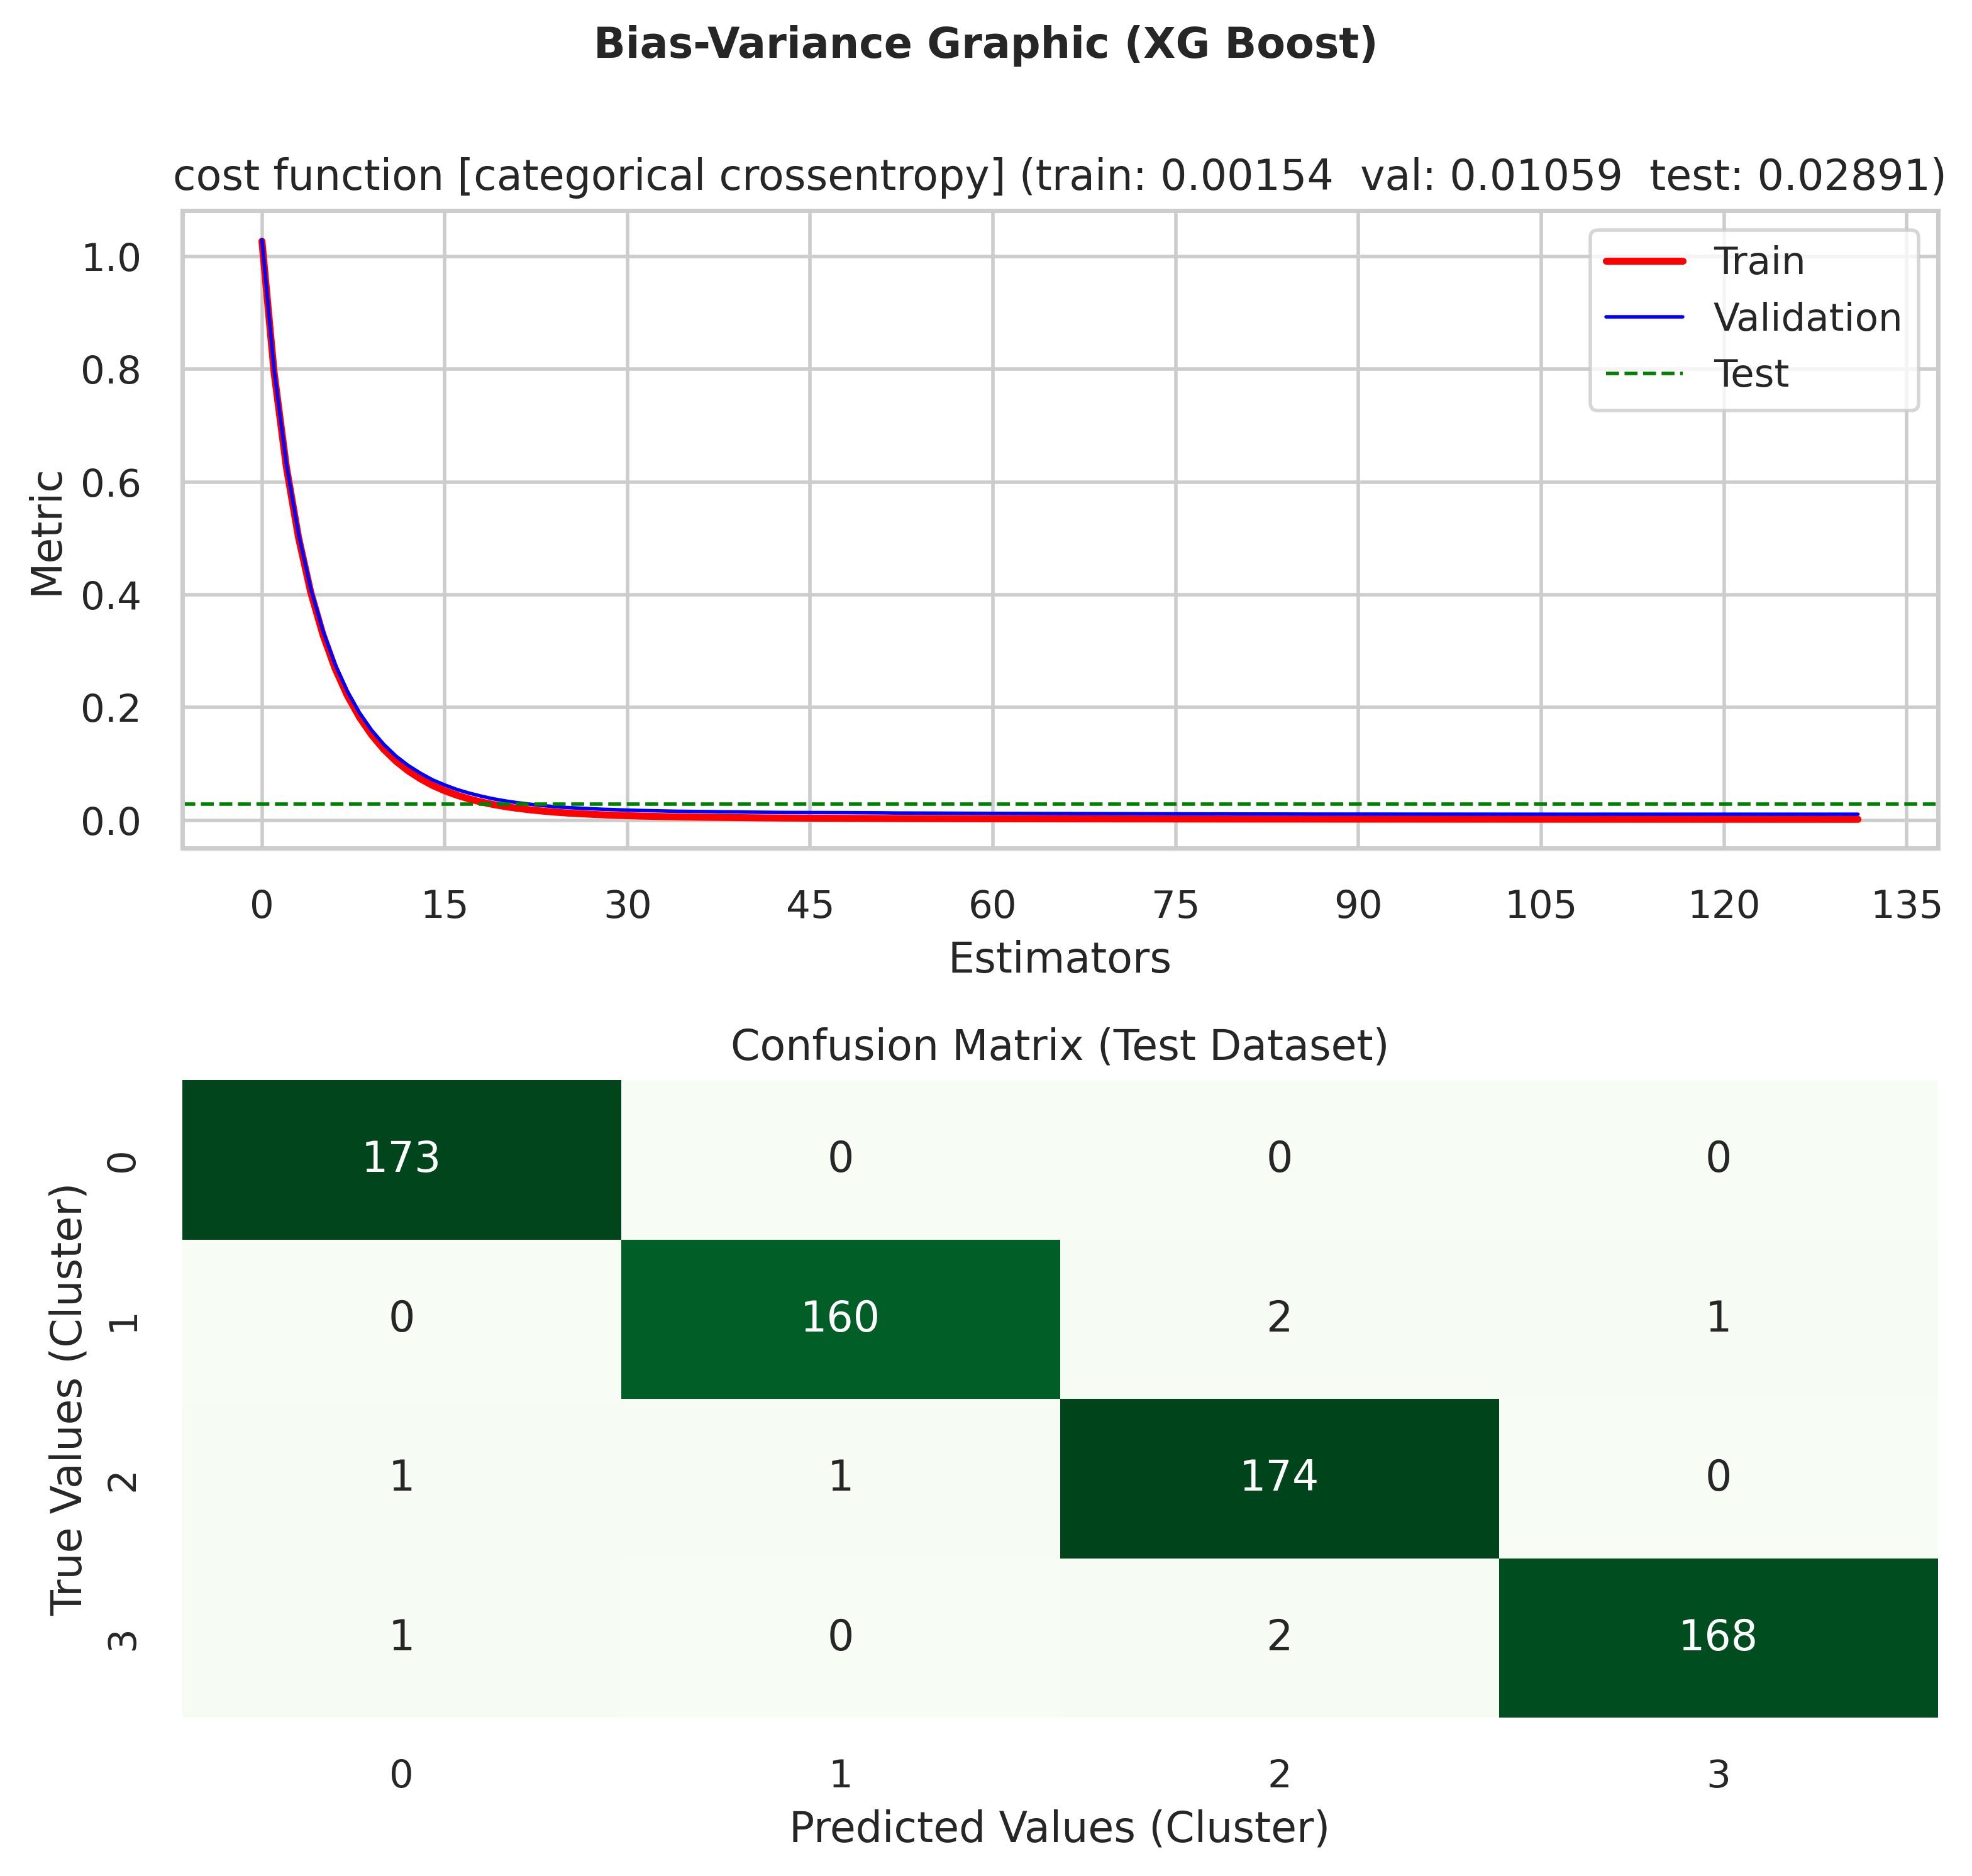

In [93]:
history_xgb_nav_class = xgb_nav_class.fit(return_history=True, graphic=True, graphic_save_extension='png', verbose=0)

In [94]:
end_time_8 = time()

In [95]:
start_time_9 = time()

In [96]:
pred_xgb_nav_class = xgb_nav_class.predict(sample_nav_class)

Inference time: 8.94 milliseconds (10 register(s))


In [97]:
pred_xgb_nav_class

speed      altitude  fuel_consumed  Cluster  \
1335  533.100000  23634.520000    1137.071120        3   
3467  383.790000  34491.820000    1115.915485        1   
1495  540.500000  19508.770000    1325.789589        0   
4444  403.354165  18522.930382    1043.113675        2   
3893  402.760000  32506.950000    1038.137185        1   
3508  360.540000  22564.000000    1010.935314        1   
602   373.870000  19953.350000     950.877943        1   
354   393.070000  11328.430000    1169.989570        2   
1044  407.710000  21420.030000    1015.286528        1   
2101  384.630000  23952.480000     989.811041        1   

     Cluster (XGB prediction)  
1335                        3  
3467                        1  
1495                        0  
4444                        2  
3893                        1  
3508                        1  
602                         1  
354                         2  
1044                        1  
2101                        1

In [98]:
end_time_9 = time()

In [99]:
print(f"Tempo de Treinamento: {end_time_8 - start_time_8}")

Tempo de Treinamento: 1064.2018163204193


In [100]:
print(f"Tempo de Inferência: {end_time_9 - start_time_9}")

Tempo de Inferência: 0.0667574405670166
